<a href="https://colab.research.google.com/github/geehaad/ML-master-projects/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1> User Knowledge Modeling</h>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<img src="https://thebossmagazine.com/wp-content/uploads/2021/02/AdobeStock_113497036-scaled.jpeg"
 style="float:right;width:50px;height:50px;">

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Import label encoder
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Perceptron
%matplotlib inline

# Investigate The Dataset

In [ ]:
# Load the dataset from the excel sheet using pandas
df_train = pd.read_csv("/content/drive/MyDrive/Applied_Machine_Learning/DUMD_train.csv")

In [ ]:
df_train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,High
319,0.85,0.82,0.66,0.83,0.83,High
320,0.56,0.60,0.77,0.13,0.32,Low
321,0.66,0.68,0.81,0.57,0.57,Medium


In [ ]:
# Split the testing data
df_test =  pd.read_csv("/content/drive/MyDrive/Applied_Machine_Learning/DUMD_test.csv")
df_test

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,Medium
76,0.288,0.310,0.790,0.23,0.24,Low
77,0.260,0.260,0.310,0.26,0.13,Very Low
78,0.990,0.490,0.070,0.70,0.69,High


<h4> Drop unnamed data
<h4> Drop Attribute Information

In [ ]:
# Show the Train data colums
df_train.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

In [ ]:
# Show the Test data colums
df_test.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

In [ ]:
#The UNS columns contains space in its name, so we need to change it.
df_train.rename(columns={' UNS':"UNS"}, inplace = True)

In [ ]:
#The UNS columns contains space in its name, so we need to change it.
df_test.rename(columns={' UNS':"UNS"}, inplace = True)

In [ ]:
# Get useful information from the dataset
df_train.info

<bound method DataFrame.info of       STG   SCG   STR   LPR   PEG       UNS
0    0.00  0.00  0.00  0.00  0.00  Very Low
1    0.08  0.08  0.10  0.24  0.90      High
2    0.10  0.10  0.15  0.65  0.30    Medium
3    0.08  0.08  0.08  0.98  0.24       Low
4    0.09  0.15  0.40  0.10  0.66    Medium
..    ...   ...   ...   ...   ...       ...
318  0.90  0.78  0.62  0.32  0.89      High
319  0.85  0.82  0.66  0.83  0.83      High
320  0.56  0.60  0.77  0.13  0.32       Low
321  0.66  0.68  0.81  0.57  0.57    Medium
322  0.68  0.64  0.79  0.97  0.24    Medium

[323 rows x 6 columns]>

Check for null values

In [ ]:
df_train.isna().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

The data doesnot contain null values.

In [ ]:
df_train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,High
319,0.85,0.82,0.66,0.83,0.83,High
320,0.56,0.60,0.77,0.13,0.32,Low
321,0.66,0.68,0.81,0.57,0.57,Medium


In [ ]:
df_test

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,Medium
76,0.288,0.310,0.790,0.23,0.24,Low
77,0.260,0.260,0.310,0.26,0.13,Very Low
78,0.990,0.490,0.070,0.70,0.69,High


## Visualization

The percentage of each knowledge level user.



In [ ]:
vs = df_train["UNS"].value_counts().to_frame()

In [ ]:
vs['UNS'] 

Low         103
Medium      100
High         81
Very Low     39
Name: UNS, dtype: int64

In [ ]:
vs.index

Index(['Low', 'Medium', 'High', 'Very Low'], dtype='object')

In [ ]:
vs.UNS

Low         103
Medium      100
High         81
Very Low     39
Name: UNS, dtype: int64

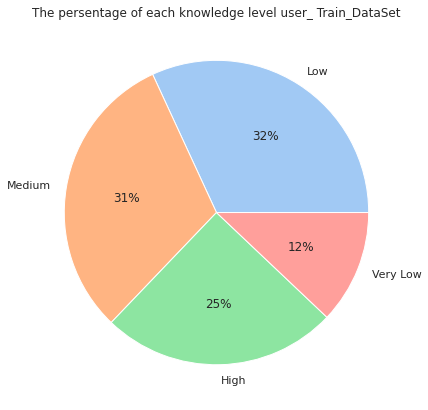

In [ ]:
#define data
data = vs.UNS
keys = vs.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Change the graph size
sns.set(rc={"figure.figsize":(7, 7)}) 

plt.title("The persentage of each knowledge level user_ Train_DataSet")
#create pie chart
plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.show()

Visualize the relation between university knowledge level and the degree of study time for goal object materails.


<Figure size 1440x432 with 0 Axes>

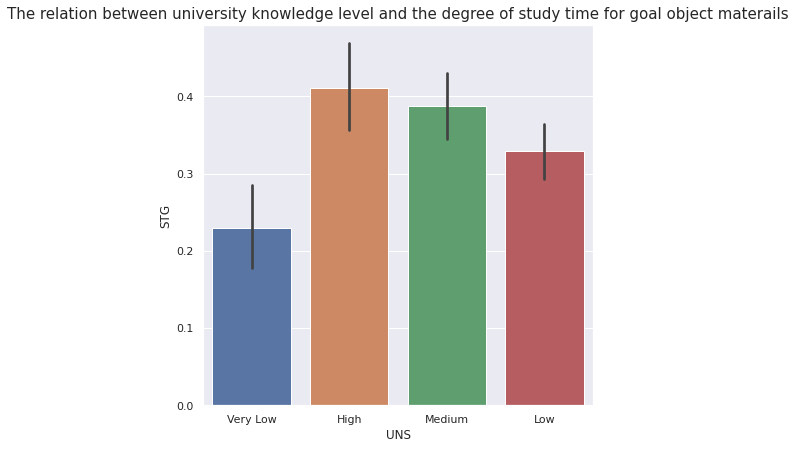

<Figure size 1440x432 with 0 Axes>

In [ ]:
labels = df_train["UNS"]
data = df_train["STG"]
ax = sns.barplot(x=labels, y = data)
# Set title
ax.set_title('The relation between university knowledge level and the degree of study time for goal object materails', fontsize=15)
# SEt X labels
ax.set_xticklabels(labels=labels);
# Figure Size
plt.figure(figsize=(20,6))

Visualize the relation between university knowledge level andthe degree of repetition number of user for goal object materails.

<Figure size 1440x432 with 0 Axes>

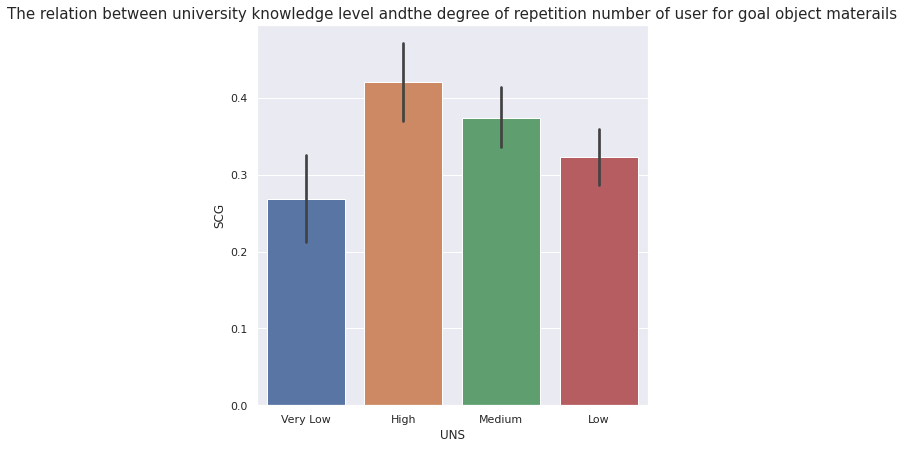

<Figure size 1440x432 with 0 Axes>

In [ ]:
labels = df_train["UNS"]
data = df_train["SCG"]
ax = sns.barplot(x=labels, y = data)
# Set title
ax.set_title('The relation between university knowledge level andthe degree of repetition number of user for goal object materails', fontsize=15)
# SEt X labels
ax.set_xticklabels(labels=labels);
# Figure Size
plt.figure(figsize=(20,6))

Visualize the relation between university knowledge level and the degree of study time of user for related objects with goal object.

<Figure size 1440x432 with 0 Axes>

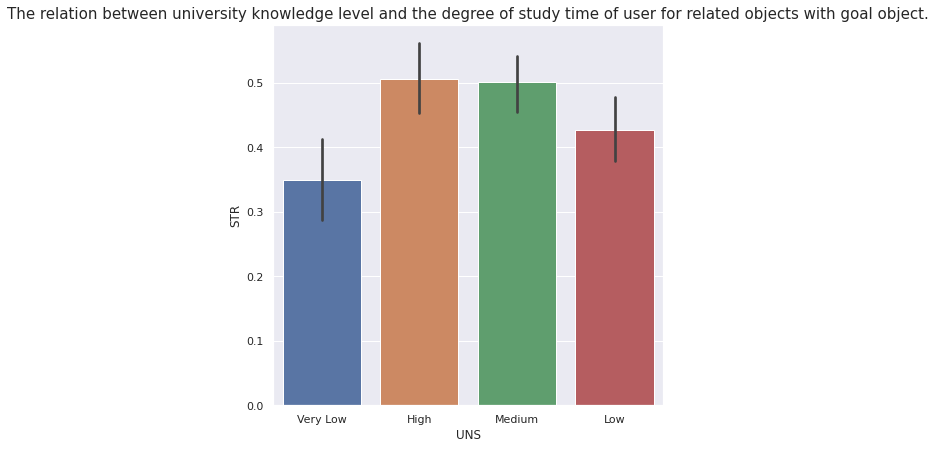

<Figure size 1440x432 with 0 Axes>

In [ ]:
labels = df_train["UNS"]
data = df_train["STR"]
ax = sns.barplot(x=labels, y = data)
# Set title
ax.set_title('The relation between university knowledge level and the degree of study time of user for related objects with goal object.', fontsize=15)
# SEt X labels
ax.set_xticklabels(labels=labels);
# Figure Size
plt.figure(figsize=(20,6))


Visualize the relation between university knowledge level and the exam performance of user for related objects with goal object

<Figure size 1440x432 with 0 Axes>

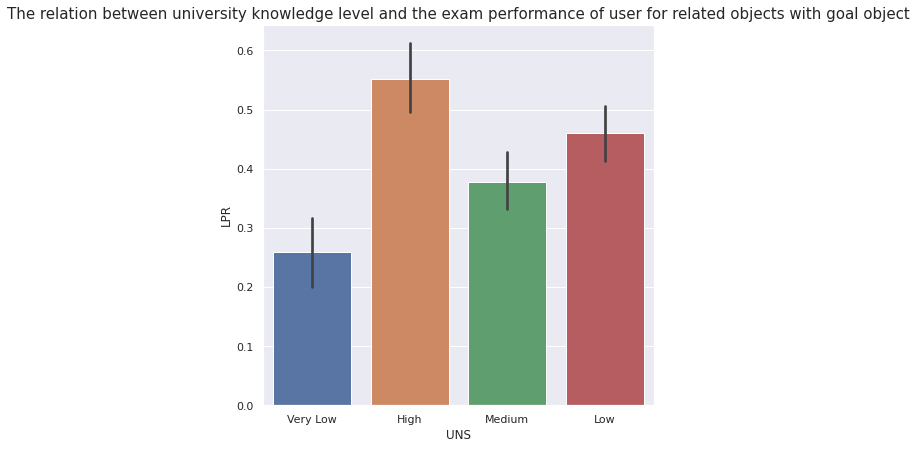

<Figure size 1440x432 with 0 Axes>

In [ ]:
labels = df_train["UNS"]
data = df_train["LPR"]
ax = sns.barplot(x=labels, y = data)
# Set title
ax.set_title('The relation between university knowledge level and the exam performance of user for related objects with goal object', fontsize=15)
# SEt X labels
ax.set_xticklabels(labels=labels);
# Figure Size
plt.figure(figsize=(20,6))


Visualize the relation between university knowledge level and the exam performance of user for goal objects

<Figure size 1440x432 with 0 Axes>

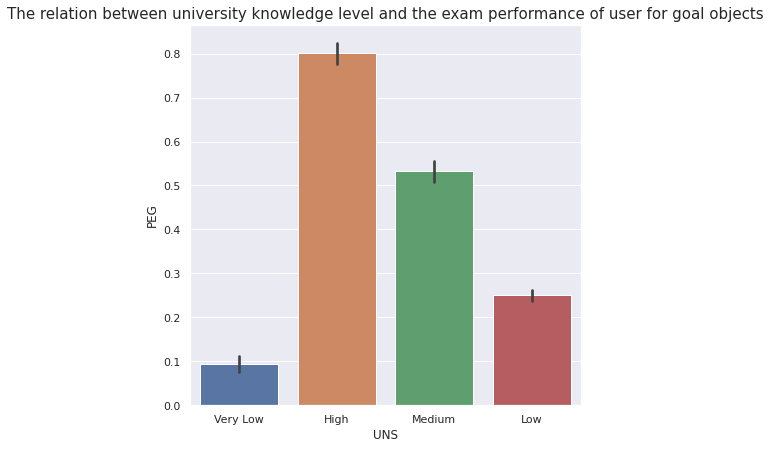

<Figure size 1440x432 with 0 Axes>

In [ ]:
labels = df_train["UNS"]
data = df_train["PEG"]
ax = sns.barplot(x=labels, y = data)
# Set title
ax.set_title('The relation between university knowledge level and the exam performance of user for goal objects', fontsize=15)
# SEt X labels
ax.set_xticklabels(labels=labels);
# Figure Size
plt.figure(figsize=(20,6))



## PreProcesing the categorical data

In [ ]:
df_train['UNS'].value_counts()

Low         103
Medium      100
High         81
Very Low     39
Name: UNS, dtype: int64

Encode the UNS column using label encoding.

In [ ]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
df_train['UNS']= label_encoder.fit_transform(df_train['UNS'])

df_train.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
5,0.10,0.10,0.43,0.29,0.56,2
6,0.20,0.14,0.35,0.72,0.25,1
7,0.00,0.00,0.50,0.20,0.85,0
8,0.18,0.18,0.55,0.30,0.81,0
9,0.06,0.06,0.51,0.41,0.30,1


In [ ]:
df_train['UNS'].value_counts()

1    103
2    100
0     81
3     39
Name: UNS, dtype: int64

Encode the UNS column using label encoding.

In [ ]:
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
df_test['UNS']= label_encoder.fit_transform(df_test['UNS'])
df_test.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0
5,0.460,0.200,0.760,0.95,0.65,0
6,0.190,0.380,0.380,0.49,0.45,2
7,0.210,0.780,0.420,0.32,0.84,0
8,0.270,0.310,0.320,0.41,0.28,1
9,0.410,0.110,0.210,0.44,0.57,2


# Modeling

In [ ]:
# split the Train_data to feature and the target
X_train = df_train.drop(['UNS'], axis = 1).values
y_train = df_train['UNS']

In [ ]:
# split the Test_data to feature and the target
X_test = df_train.drop(['UNS'], axis = 1).values
y_test = df_train['UNS']

In [ ]:
df_train.drop(['UNS'], axis = 1)

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66
...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89
319,0.85,0.82,0.66,0.83,0.83
320,0.56,0.60,0.77,0.13,0.32
321,0.66,0.68,0.81,0.57,0.57


##Feature Selection

Correlation Matrix is a statistical method of showing the relationship between two or more variables and the interrelation in their movements etc.


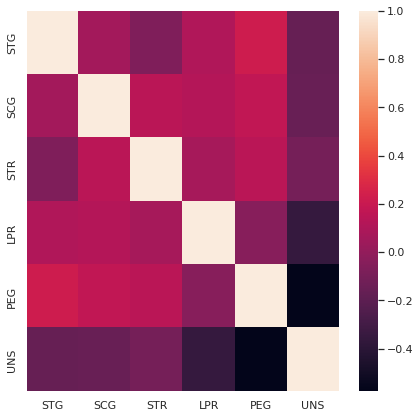

In [ ]:
corr=df_train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#Change the graph size
sns.set(rc={"figure.figsize":(6, 6)})

#### Feature Selection with Univariate Statistical Tests

---



In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
# summarize selected features
f = pd.DataFrame(features)
f.columns = ['STG','SCG','STR','LPR','PEG']
print(pd.DataFrame(f))

[  7.987   5.927   5.352  15.025 633.678]
      STG   SCG   STR   LPR   PEG
0    0.00  0.00  0.00  0.00  0.00
1    0.08  0.08  0.10  0.24  0.90
2    0.10  0.10  0.15  0.65  0.30
3    0.08  0.08  0.08  0.98  0.24
4    0.09  0.15  0.40  0.10  0.66
..    ...   ...   ...   ...   ...
318  0.90  0.78  0.62  0.32  0.89
319  0.85  0.82  0.66  0.83  0.83
320  0.56  0.60  0.77  0.13  0.32
321  0.66  0.68  0.81  0.57  0.57
322  0.68  0.64  0.79  0.97  0.24

[323 rows x 5 columns]


##Function that Calculate Accuracy Precentage

In [ ]:
def getAccuracy(model, x, y):
  return model.score(x,y)*100

# SVM

<p> We chose the cols: 'PEG', 'LPR'; Due to the Correlation Matrix, these two features have the largest relationship with the target.<br>
 We also use the Univariate Feature Selection or Testing applies statistical tests to find relationships between the output variable and each input variable in isolation that shows the same result.

It is possible to access the classifier coefficients using .coef_ on the trained model. These weights figure the orthogonal vector coordinates orthogonal to the hyperplane. Their direction represents instead the predicted class.

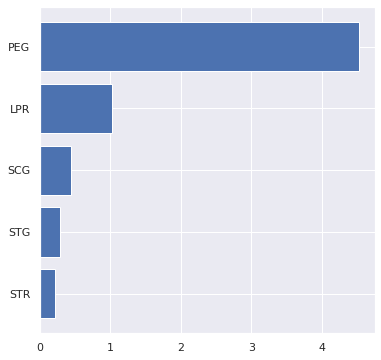

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    
    plt.show()

features_names = ['STG',	'SCG', 'STR',	'LPR', 'PEG']
svml = SVC(kernel='linear',gamma = 'scale', shrinking = False,)
svml.fit(X_train, y_train)
f_importances(svml.coef_[0], features_names)

### Linear Kernal

In [ ]:
#Split the dataset
X_train_, y_train_ = df_train[['PEG', 'LPR']], df_train['UNS']
X_test_, y_test_ = df_test[['PEG', 'LPR']], df_test['UNS']

### Plot the data by showing classes separately

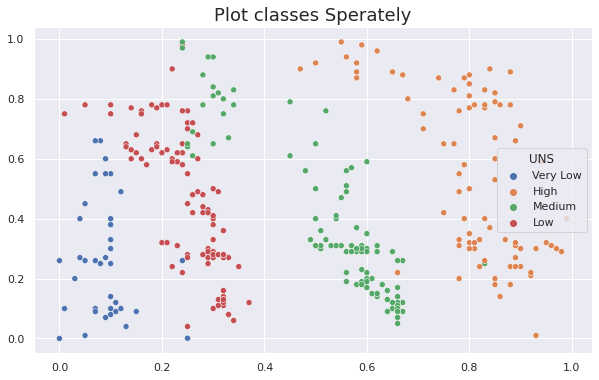

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Plot classes Sperately", fontsize=18)
sns.scatterplot(X_train_.values[:,0], X_train_.values[:,1], c=y_train_, cmap='cool',hue= labels)

### Classify testing data by using SVM

In [ ]:
#Train the model using the training sets
model = SVC(kernel='linear', C=10)
svm = model.fit(X_train_.values, y_train_.values)

#Predict the response for test dataset
y_pred_ = svm.predict(X_test_.values)
y_pred_

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 3, 2, 1, 1,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

## Model Evaluation

In [ ]:
print(classification_report(svm.predict(X_train_), y_train_))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.97      0.89      0.93       112
           2       0.94      0.97      0.95        97
           3       0.82      0.94      0.88        34

    accuracy                           0.94       323
   macro avg       0.93      0.95      0.94       323
weighted avg       0.95      0.94      0.94       323



In [ ]:
print(classification_report(svm.predict(X_test_), y_test_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        29
           2       1.00      1.00      1.00        22
           3       0.73      1.00      0.84         8

    accuracy                           0.96        80
   macro avg       0.93      0.97      0.95        80
weighted avg       0.97      0.96      0.96        80



The accuracy of SVM linear Kernel for training and testing in order  is: 94%, 96%, and we also use the nonlinear kernel to see its affect.

In [ ]:
#Generate the confusion matrix
def conf_matrix(y_testt, y_predd):
    cf_matrix_ = confusion_matrix(y_testt, y_predd)
    
    print(cf_matrix_)

    ax = sns.heatmap(cf_matrix_, annot=True,cmap=plt.cm.Blues)

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    labels = y_testt.values
    sett = set()
    sett.update((labels))
    ax.xaxis.set_ticklabels(sett)
    ax.yaxis.set_ticklabels(sett)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  0 22  0]
 [ 0  3  0  8]]


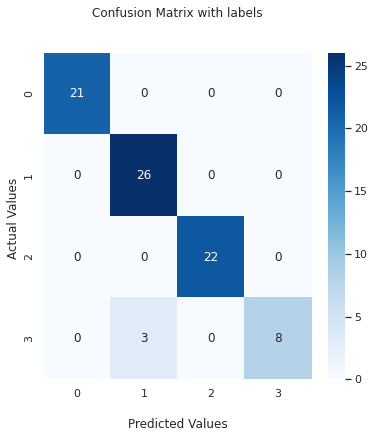

In [ ]:
conf_matrix(y_test_, y_pred_)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Drow Decision boundries

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
def MakeDecision_Boundary(X_train_or_Test,y_train_or_Test,model, title_):
  fig, ax = plt.subplots()
  # title for the plots
  title = (title_)
  # Set-up grid for plotting.
  X0, X1 = X_train_or_Test[:, 0], X_train_or_Test[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train_or_Test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_ylabel('LDR')
  ax.set_xlabel('PEG')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
  ax.legend()
  plt.show()

### Decision Boundries fot Train Data

No handles with labels found to put in legend.


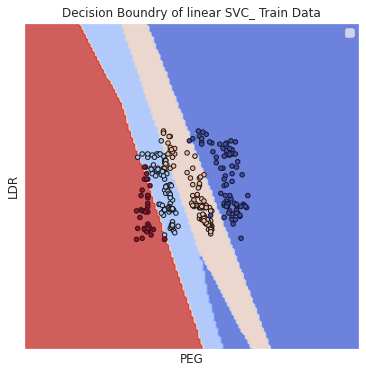

In [ ]:
MakeDecision_Boundary(X_train_.values,y_train_.values,svm,"Decision Boundry of linear SVC_ Train Data")

### Decision Boundries fot Test Data

No handles with labels found to put in legend.


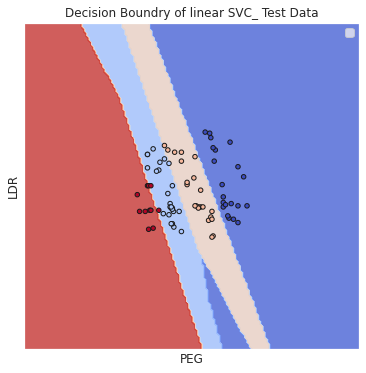

In [ ]:
MakeDecision_Boundary(X_test_.values,y_test_.values,svm, "Decision Boundry of linear SVC_ Test Data")

### Radial Basis Kernel
#### non-linear classifier

In [ ]:
rbf_svc = SVC(kernel='rbf', C=10).fit(X_train_, y_train_)
y_pred_rbf = rbf_svc.predict(X_test_)

y_pred_rbf

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

In [ ]:
print(classification_report(rbf_svc.predict(X_train_), y_train_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.98      0.93      0.95       109
           2       0.94      0.98      0.96        96
           3       0.92      0.97      0.95        37

    accuracy                           0.96       323
   macro avg       0.96      0.97      0.96       323
weighted avg       0.96      0.96      0.96       323



In [ ]:
print(classification_report(rbf_svc.predict(X_test_), y_test_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.93      0.96        28
           2       0.95      1.00      0.98        21
           3       0.91      1.00      0.95        10

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.97        80



The accuracy of SVM Non-Linear Kernel for training and testing in order  is: 96%, 97%, Which shows better performance than Linear Kernel.

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  1 21  0]
 [ 0  1  0 10]]


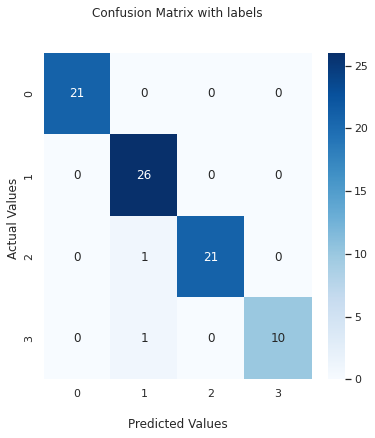

In [ ]:
conf_matrix(y_test_, y_pred_rbf)

### Drow the decision boundry

No handles with labels found to put in legend.


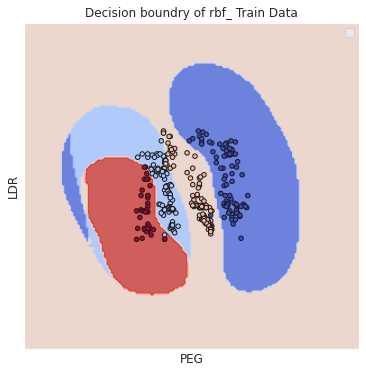

In [ ]:
MakeDecision_Boundary(X_train_.values,y_train_.values,rbf_svc, "Decision boundry of rbf_ Train Data")

No handles with labels found to put in legend.


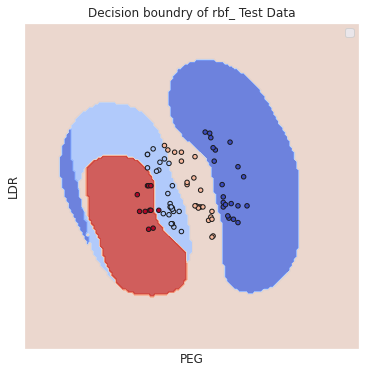

In [ ]:
MakeDecision_Boundary(X_test_.values,y_test_.values,rbf_svc, "Decision boundry of rbf_ Test Data")

## Perceptron Classifier

In [ ]:
precptron_Classfier = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
precptron_Classfier.fit(X_train_, y_train_)
print('Accuracy of clf_1_Train: {:.2f}%'.format(getAccuracy(precptron_Classfier, X_train_, y_train_)))
print('Accuracy of clf_1_Test: {:.2f}%'.format(getAccuracy(precptron_Classfier, X_test_, y_test_)))

Accuracy of clf_1_Train: 72.45%
Accuracy of clf_1_Test: 66.25%


The accuracy of The Perceptron algorithm for training and testing in order  is: 72%, 66%, Which shows worse performance than SVM.





In [ ]:
y_pred_precepton = precptron_Classfier.predict(X_test_)
y_pred_precepton

array([2, 1, 2, 3, 2, 0, 2, 2, 1, 2, 1, 1, 2, 3, 2, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 3, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 1,
       3, 3, 0, 1, 1, 2, 1, 2, 2, 2, 1, 3, 0, 1])

In [ ]:
print(classification_report(precptron_Classfier.predict(X_train_), y_train_))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        42
           1       0.85      0.69      0.76       128
           2       0.77      0.62      0.68       125
           3       0.69      0.96      0.81        28

    accuracy                           0.72       323
   macro avg       0.71      0.82      0.73       323
weighted avg       0.76      0.72      0.73       323



In [ ]:
print(classification_report(precptron_Classfier.predict(X_test_), y_test_))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.81      0.66      0.72        32
           2       0.68      0.48      0.57        31
           3       0.64      1.00      0.78         7

    accuracy                           0.66        80
   macro avg       0.65      0.79      0.68        80
weighted avg       0.70      0.66      0.66        80



### Drow the decision boundry for Training

No handles with labels found to put in legend.


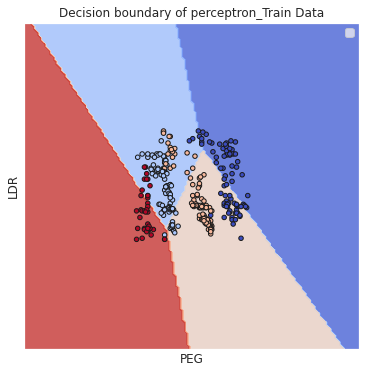

In [ ]:
MakeDecision_Boundary(X_train_.values,y_train_.values,precptron_Classfier,"Decision boundary of perceptron_Train Data")

### Drow the decision boundry for Testing

No handles with labels found to put in legend.


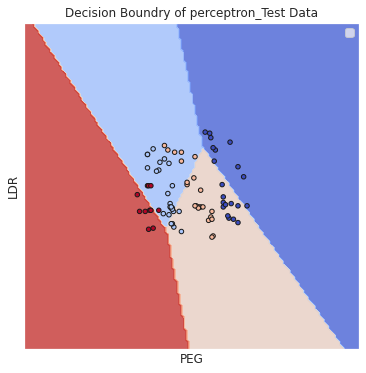

In [ ]:
MakeDecision_Boundary(X_test_.values,y_test_.values,precptron_Classfier, "Decision Boundry of perceptron_Test Data")

### Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Perceptron Confusion Matrix ')

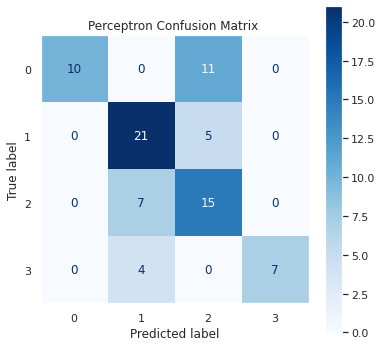

In [ ]:
Preceptron_plot2_non=plot_confusion_matrix(precptron_Classfier, X_test_, y_test_, cmap=plt.cm.Blues)  
plt.grid(False)  
plt.title("Perceptron Confusion Matrix ")

##Function that Calculate Accuracy Precentage

##Function that Plot correct and wrong predictions

In [ ]:
def PlotCorrectWrong_Preditions(actual,predicted,features):
  df= pd.DataFrame()
  df["actual"] = actual
  df["predicted"] = pd.DataFrame(predicted)
  incorrect = features[df["actual"] != df["predicted"]]
  correct = features[df["actual"] == df["predicted"]]
  plt.scatter(correct.iloc[:,0],correct.iloc[:,1],edgecolors='k',alpha=1,c ="blue")
  plt.scatter(incorrect.iloc[:,0],incorrect.iloc[:,1],edgecolors='k',alpha=1,c ="red")
  plt.title('Correct and Wrong Data Points Prediction')
  plt.xlabel('PEG')
  plt.ylabel('LPR')
  plt.show()

## Function That Plot Piechart Precentage for Correct and Wrong Preditions

In [ ]:
def DrawPieChart(data_):
#define data
  data = data_
  keys = ['Correct Prediction','Negative Prediction']

#define Seaborn color palette to use
  colors = sns.color_palette('pastel')[0:5]

#Change the graph size
  sns.set(rc={"figure.figsize":(7, 7)}) 

  plt.title("The percentage of Correct and Negative knowledge level user preditions")
#create pie chart
  plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
  plt.show()

# 2. OvR-SVM

# Obtain the binarized labels (OvR)

### MultiLabel Binarizer for Train

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
yb_train = mlb.fit_transform((y_train_.to_numpy()).reshape((-1,1)))
yb_train

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [ ]:
yb1_train = yb_train[:,0]
yb2_train = yb_train[:,1]
yb3_train = yb_train[:,2]
yb4_train = yb_train[:,3]

## MultiLabel Binarizer for Test

In [ ]:
yb_test = mlb.fit_transform((y_test_.to_numpy()).reshape((-1,1)))
len(yb_test)

80

In [ ]:
yb1_test = yb_test[:,0]
yb2_test = yb_test[:,1]
yb3_test = yb_test[:,2]
yb4_test = yb_test[:,3]

# Obtain the SVM’s accuracy

## Class 1:

In [ ]:
clf_1 = SVC(kernel='linear', probability=True)
clf_1.fit(X_train_, yb1_train)
print('Accuracy of clf_1_Train: {:.2f}%'.format(getAccuracy(clf_1, X_train_, yb1_train)))
print('Accuracy of clf_1_Test: {:.2f}%'.format(getAccuracy(clf_1, X_test_, yb1_test)))

Accuracy of clf_1_Train: 99.07%
Accuracy of clf_1_Test: 100.00%


The accuracy of class 1 vs rest-SVM for training and testing in order  is: 99%, 100%.

In [ ]:
pr1 = clf_1.predict(X_test_)

In [ ]:
yb1_pred = clf_1.predict_proba(X_test_)[:,1].reshape(-1,1)

###Decision Boundary for Training

No handles with labels found to put in legend.


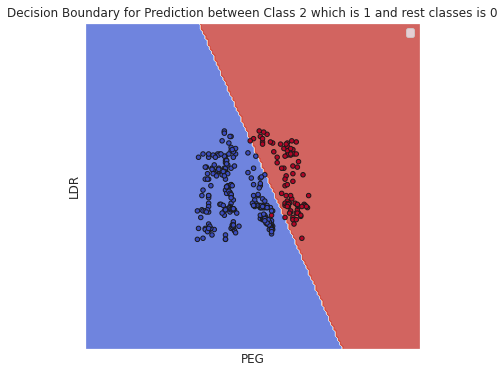

In [ ]:
MakeDecision_Boundary(X_train_.values,yb1_train,clf_1,"Decision Boundary for Prediction between Class 2 which is 1 and rest classes is 0")

###Decision Boundary for Testing

No handles with labels found to put in legend.


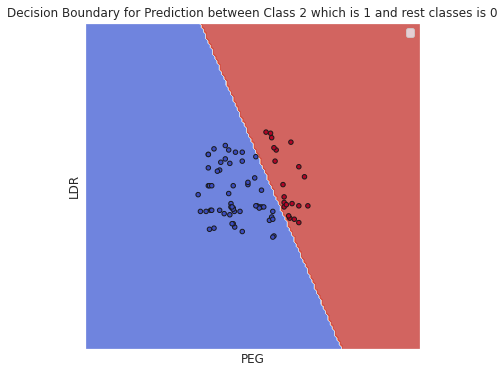

In [ ]:
MakeDecision_Boundary(X_test_.values,yb1_test,clf_1,"Decision Boundary for Prediction between Class 2 which is 1 and rest classes is 0")

###Plot Confusion Matrix 

Text(0.5, 1.0, 'OVR class 1 vs rest')

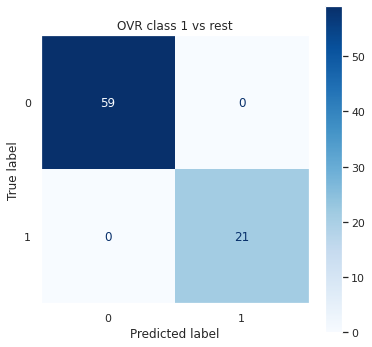

In [ ]:
asd_plot1=plot_confusion_matrix(clf_1, X_test_, yb1_test,cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR class 1 vs rest")

### Calculate Correct and Negative Predictions and Plot in Piechart

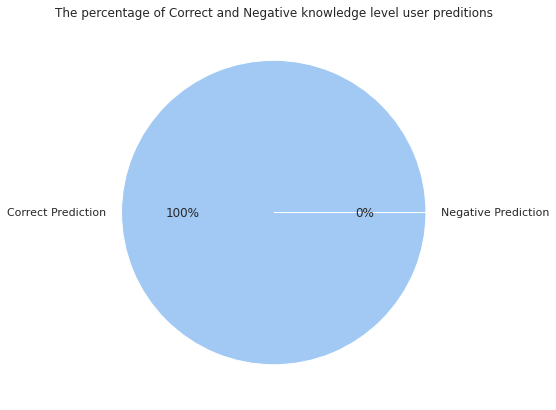

In [ ]:
asd_values1=confusion_matrix(yb1_test, pr1)
a_1= asd_values1[0][0]+asd_values1[1][1], asd_values1[0][1]+asd_values1[1][0]
DrawPieChart(a_1)


## Class 2:

In [ ]:
clf_2 = SVC(kernel='linear', probability=True)
clf_2.fit(X_train_, yb2_train)
print('Accuracy of clf_2_Train: {:.2f}%'.format(getAccuracy(clf_2, X_train_, yb2_train)))
print('Accuracy of clf_2_Test: {:.2f}%'.format(getAccuracy(clf_2, X_test_, yb2_test)))

Accuracy of clf_2_Train: 81.73%
Accuracy of clf_2_Test: 80.00%


The accuracy of class 2 vs rest-SVM for training and testing in order  is: 81.73%, 80%.

In [ ]:
yb2_pred = clf_2.predict_proba(X_test_)[:,1].reshape(-1,1)

In [ ]:
pr2 = clf_2.predict(X_test_)

### Decision Boundary for Training

No handles with labels found to put in legend.


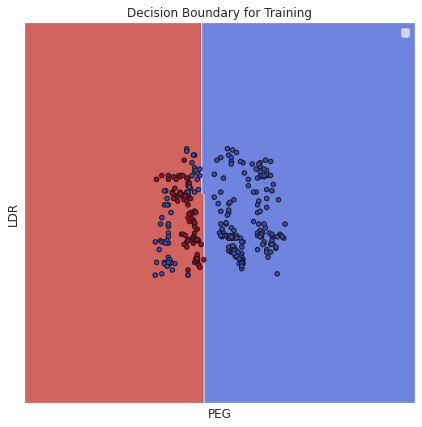

In [ ]:
MakeDecision_Boundary(X_train_.values,yb2_train,clf_2,"Decision Boundary for Training")

### Decision Boundary for Testing

No handles with labels found to put in legend.


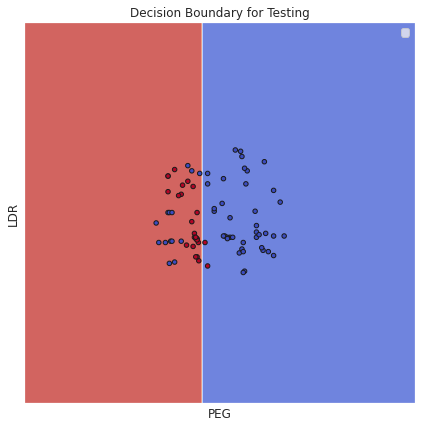

In [ ]:
MakeDecision_Boundary(X_test_.values,yb2_test,clf_2,"Decision Boundary for Testing")

Text(0.5, 1.0, 'OVR class 2 vs rest')

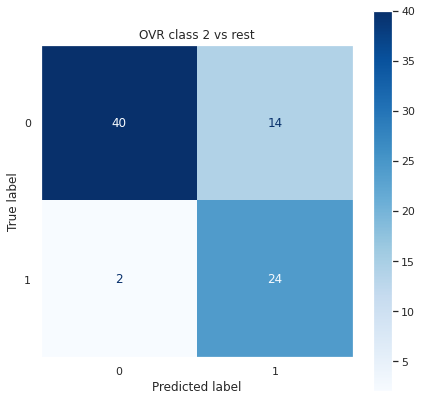

In [ ]:
asd_plot2=plot_confusion_matrix(clf_2, X_test_, yb2_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR class 2 vs rest")

In [ ]:
asd_values2=confusion_matrix(yb2_test, pr2)
asd_values2

array([[40, 14],
       [ 2, 24]])

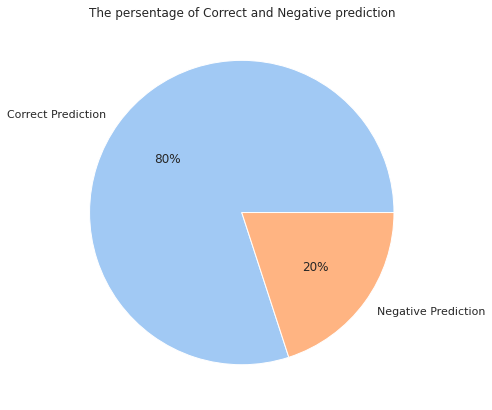

In [ ]:
a_2= asd_values2[0][0]+asd_values2[1][1], asd_values2[0][1]+asd_values2[1][0]

#define data
data = a_2
keys = ['Correct Prediction','Negative Prediction']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Change the graph size
sns.set(rc={"figure.figsize":(7, 7)}) 

plt.title("The persentage of Correct and Negative prediction")
#create pie chart
plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.show()

### The linear Kernel is not a good classifier with this class, so we change it to non linear classifier(RBF)

In [ ]:
clf_2_non = SVC(kernel='rbf', C=10, probability=True)
clf_2_non.fit(X_train_, yb2_train)
print('Accuracy of clf_2_Train: {:.2f}%'.format(getAccuracy(clf_2_non, X_train_, yb2_train)))
print('Accuracy of clf_2_Test: {:.2f}%'.format(getAccuracy(clf_2_non, X_test_, yb2_test)))

Accuracy of clf_2_Train: 96.90%
Accuracy of clf_2_Test: 97.50%


The accuracy of class 2 vs rest-SVM non-linear kernel for training and testing in order  is: 96.90%, 97.50%.

In [ ]:
yb2_pred_non = clf_2_non.predict_proba(X_test_)[:,1].reshape(-1,1)
pr2_non = clf_2_non.predict(X_test_)

### Decision Boundary for Training

No handles with labels found to put in legend.


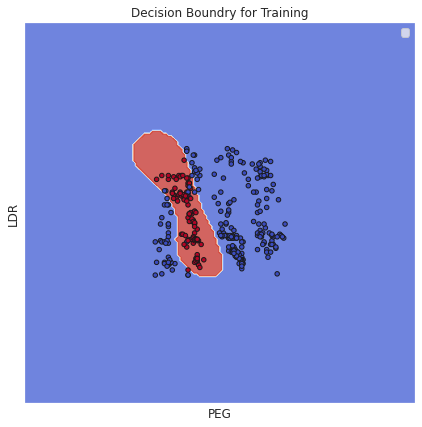

In [ ]:
MakeDecision_Boundary(X_train_.values,yb2_train,clf_2_non, "Decision Boundry for Training")

### Decision Boundary for Testing


No handles with labels found to put in legend.


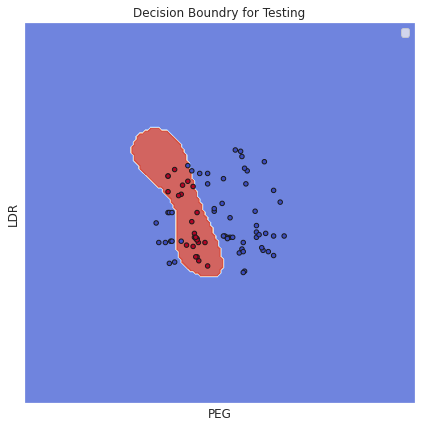

In [ ]:
MakeDecision_Boundary(X_test_.values,yb2_test,clf_2_non, "Decision Boundry for Testing")

###Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'OVR class2 vs rest_ non linear kernel')

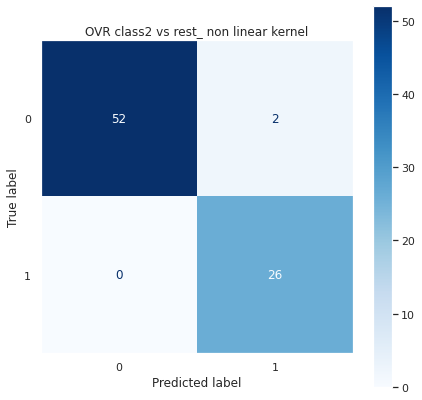

In [ ]:
asd_plot2_non=plot_confusion_matrix(clf_2_non, X_test_, yb2_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title('OVR class2 vs rest_ non linear kernel')

### Calculate Correct and Negative Predictions and Plot them in Piechart

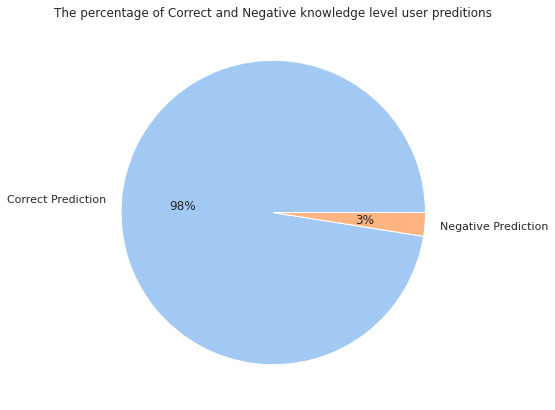

In [ ]:
asd_values2_non=confusion_matrix(yb2_test, pr2_non)
a_2_non= asd_values2_non[0][0]+asd_values2_non[1][1], asd_values2_non[0][1]+asd_values2_non[1][0]
DrawPieChart(a_2_non)

## Class 3:

In [ ]:
clf_3 = SVC(kernel='linear', probability=True)
clf_3.fit(X_train_, yb3_train)
print('Accuracy of clf_3_Train: {:.2f}%'.format(getAccuracy(clf_3, X_train_, yb3_train)))
print('Accuracy of clf_3_Test: {:.2f}%'.format(getAccuracy(clf_3, X_test_, yb3_test)))

Accuracy of clf_3_Train: 69.04%
Accuracy of clf_3_Test: 72.50%


The accuracy of class 3 vs rest-SVM for training and testing in order  is: 69.04%, 72.50%.

In [ ]:
yb3_pred = clf_3.predict_proba(X_test_)[:,1].reshape(-1,1)

In [ ]:
pr3 = clf_3.predict(X_test_)

No handles with labels found to put in legend.


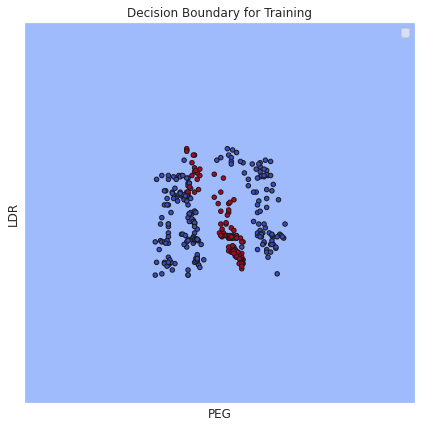

In [ ]:
MakeDecision_Boundary(X_train_.values,yb3_train,clf_3, "Decision Boundary for Training")

No handles with labels found to put in legend.


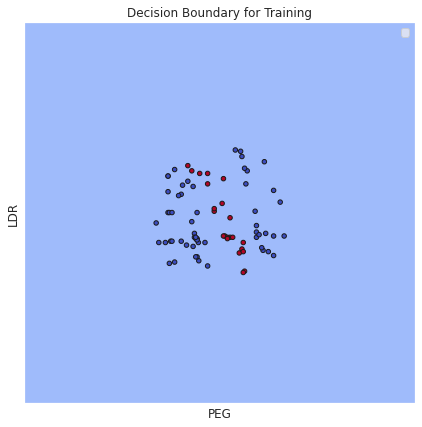

In [ ]:
MakeDecision_Boundary(X_test_.values,yb3_test,clf_3, "Decision Boundary for Training")

Text(0.5, 1.0, 'OVR Class 3 vs rest Linear Kernel')

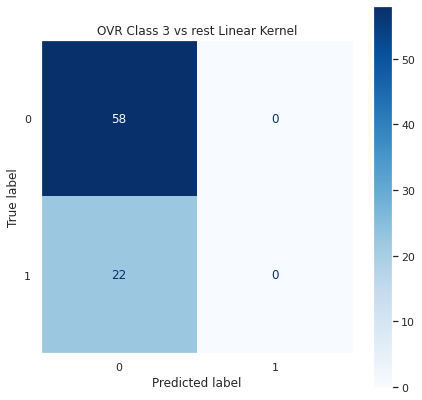

In [ ]:
asd_plot3=plot_confusion_matrix(clf_3, X_test_, yb3_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR Class 3 vs rest Linear Kernel")

### Calculate Correct and Negative Predictions and Plot them in Piechart

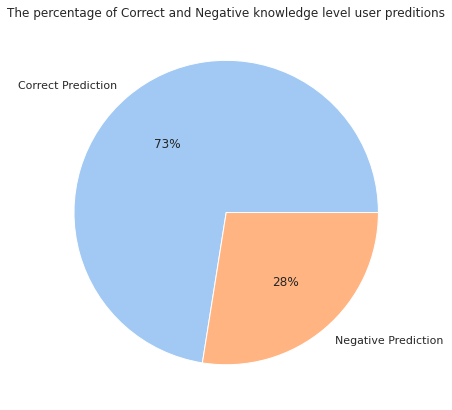

In [ ]:
asd_values3=confusion_matrix(yb3_test, pr3)
a_3= asd_values3[0][0]+asd_values3[1][1], asd_values3[0][1]+asd_values3[1][0]
DrawPieChart(a_3)

### The linear Kernal doesnot make a good classify with this class, so we change it to non linear classifier(RBF)

In [ ]:
clf_3_non = SVC(kernel='rbf', C=10, probability=True)
clf_3_non.fit(X_train_, yb3_train)
print('Accuracy of clf_3_Train: {:.2f}%'.format(getAccuracy(clf_3_non, X_train_, yb3_train)))
print('Accuracy of clf_3_Test: {:.2f}%'.format(getAccuracy(clf_3_non, X_test_, yb3_test)))

Accuracy of clf_3_Train: 97.52%
Accuracy of clf_3_Test: 98.75%


The accuracy of class 3 vs rest-SVM Non-Linear Kernel for training and testing in order  is: 97.52%, 98.75%.

In [ ]:
yb3_pred_non = clf_3_non.predict_proba(X_test_)[:,1].reshape(-1,1)
pr3_non = clf_3_non.predict(X_test_)

### Decision Boundary for Training


No handles with labels found to put in legend.


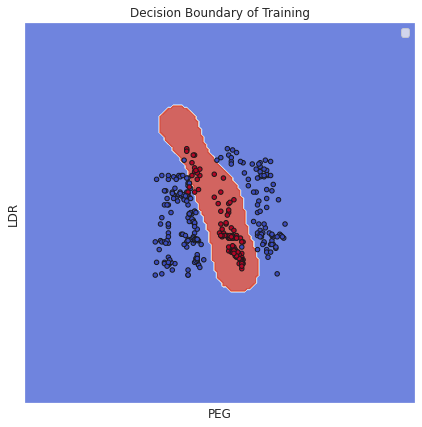

In [ ]:
MakeDecision_Boundary(X_train_.values,yb3_train,clf_3_non, "Decision Boundary of Training")

### Decision Boundary for Testing


No handles with labels found to put in legend.


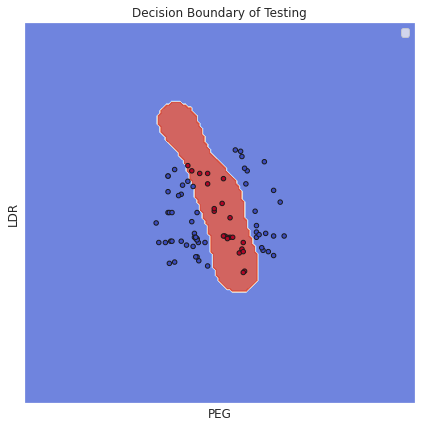

In [ ]:
MakeDecision_Boundary(X_test_.values,yb3_test,clf_3_non, "Decision Boundary of Testing")

###Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'OVR Class 3 vs rest non Linear Kernel')

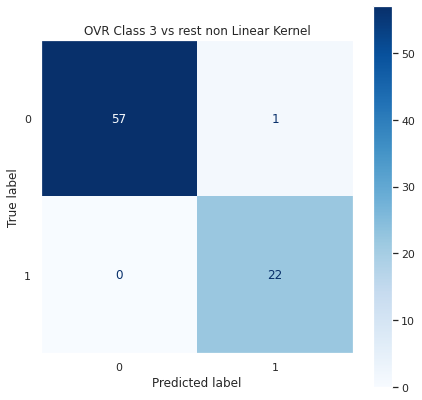

In [ ]:
asd_plot3_non=plot_confusion_matrix(clf_3_non, X_test_, yb3_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR Class 3 vs rest non Linear Kernel")

### Calculate Correct and Negative Predictions and Plot them in Piechart

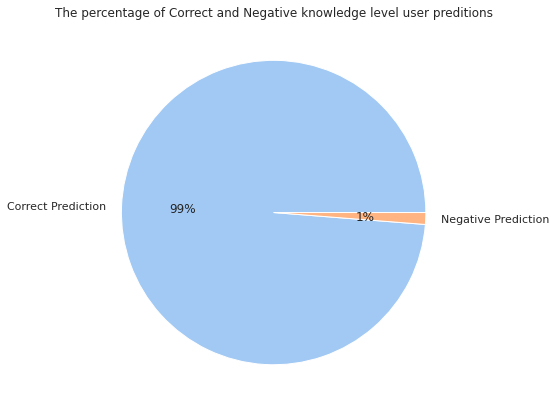

In [ ]:
asd_values3_non=confusion_matrix(yb3_test, pr3_non)
a_3_non= asd_values3_non[0][0]+asd_values3_non[1][1], asd_values3_non[0][1]+asd_values3_non[1][0]
DrawPieChart(a_3_non)

## Class 4:

In [ ]:
clf_4 = SVC(kernel='linear', probability=True)
clf_4.fit(X_train_, yb4_train)
print('Accuracy of clf_4_Train: {:.2f}%'.format(getAccuracy(clf_4, X_train_, yb4_train)))
print('Accuracy of clf_4_Test: {:.2f}%'.format(getAccuracy(clf_4, X_test_, yb4_test)))


Accuracy of clf_4_Train: 95.36%
Accuracy of clf_4_Test: 93.75%


The accuracy of class 2 vs rest-SVM Linear Kernel for training and testing in order  is: 95.36%, 93.75%.

In [ ]:
yb4_pred = clf_4.predict_proba(X_test_)[:,1].reshape(-1,1)

In [ ]:
pr4 = clf_4.predict(X_test_)

<h3> Plot SVM’s decision boundary for Training

No handles with labels found to put in legend.


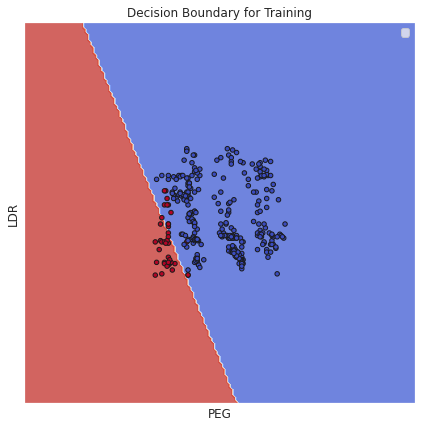

In [ ]:
MakeDecision_Boundary(X_train_.values,yb4_train,clf_4, "Decision Boundary for Training")

<h3> Plot SVM’s decision boundary for Testing

No handles with labels found to put in legend.


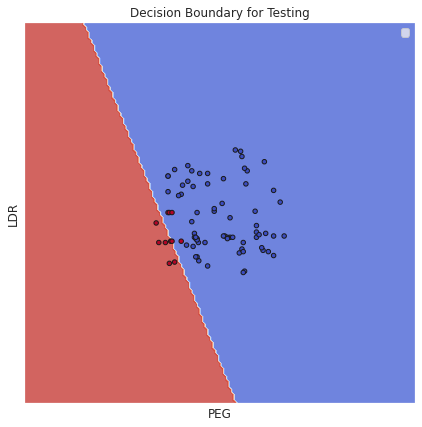

In [ ]:
MakeDecision_Boundary(X_test_.values,yb4_test,clf_4, "Decision Boundary for Testing")

Text(0.5, 1.0, 'OVR Class 4 vs rest Linear Kernel')

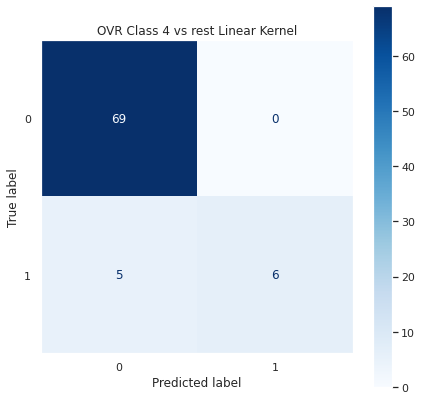

In [ ]:
asd_plot4=plot_confusion_matrix(clf_4, X_test_, yb4_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR Class 4 vs rest Linear Kernel")

### Calculate Correct and Negative Predictions and Plot them in Piechart

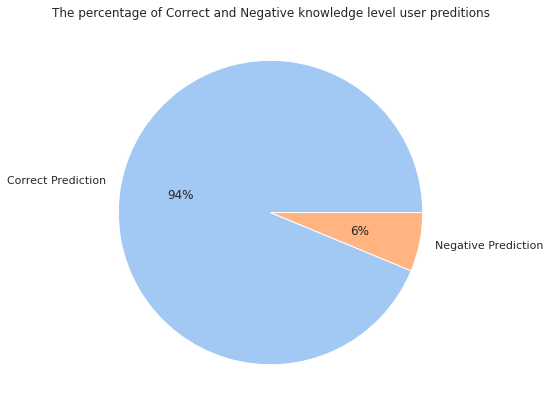

In [ ]:
asd_values4=confusion_matrix(yb4_test, pr4)
a_4= asd_values4[0][0]+asd_values4[1][1], asd_values4[0][1]+asd_values4[1][0]
DrawPieChart(a_4)

### The linear Kernal doesnot make a good classify with this class, so we change it to non linear classifier(RBF)

In [ ]:
clf_4_non = SVC(kernel='rbf', C=10, probability=True)
clf_4_non.fit(X_train_, yb4_train)
print('Accuracy of clf_4_Train: {:.2f}%'.format(getAccuracy(clf_4_non, X_train_, yb4_train)))
print('Accuracy of clf_4_Test: {:.2f}%'.format(getAccuracy(clf_4_non, X_test_, yb4_test)))

Accuracy of clf_4_Train: 98.76%
Accuracy of clf_4_Test: 98.75%


The accuracy of class 4 vs rest-SVM Non-Linear Kernel for training and testing in order  is: 98.76%, 98.75%.

In [ ]:
yb4_pred_non = clf_4_non.predict_proba(X_test_)[:,1].reshape(-1,1)
pr4_non = clf_4_non.predict(X_test_)

### Decision boundary of SVC for training

No handles with labels found to put in legend.


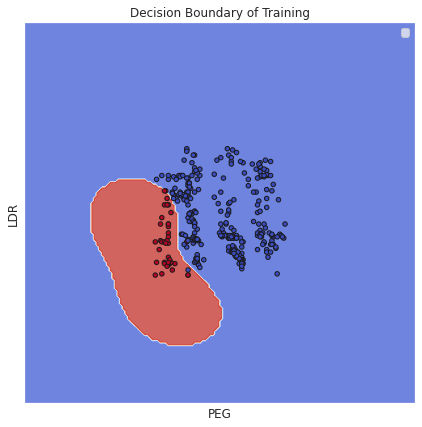

In [ ]:
MakeDecision_Boundary(X_train_.values,yb4_train,clf_4_non, "Decision Boundary of Training")

### Decision boundary of SVC for testing

No handles with labels found to put in legend.


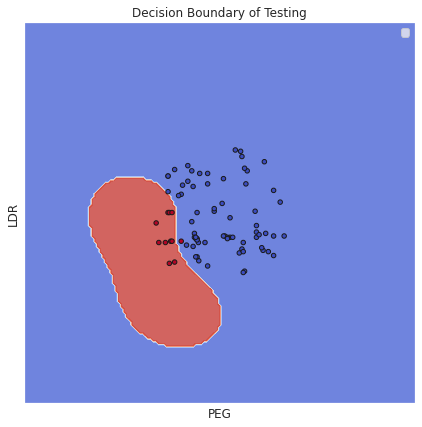

In [ ]:
MakeDecision_Boundary(X_test_.values,yb4_test,clf_4_non, "Decision Boundary of Testing")

###Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'OVR Class 4 vs rest non Linear Kernel')

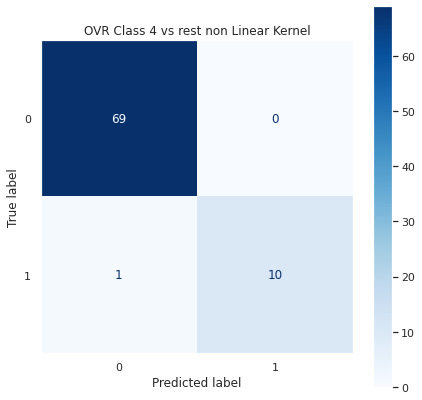

In [ ]:
asd_plot4_non=plot_confusion_matrix(clf_4_non, X_test_, yb4_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("OVR Class 4 vs rest non Linear Kernel")

### Calculate Correct and Negative Predictions and Plot them in Piechart

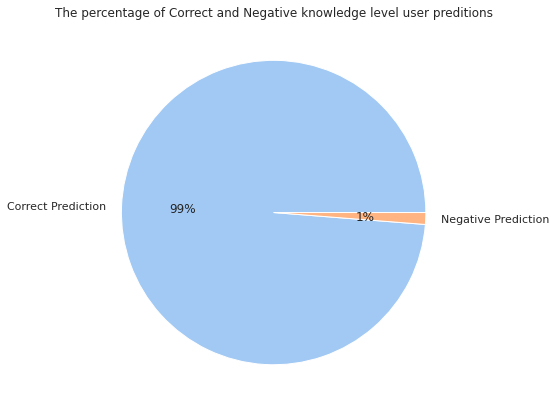

In [ ]:
asd_values4_non=confusion_matrix(yb4_test, pr4_non)
a_4_non= asd_values4_non[0][0]+asd_values4_non[1][1], asd_values4_non[0][1]+asd_values4_non[1][0]
DrawPieChart(a_4_non)

## Argmax

In [ ]:
yb_all = np.hstack((yb1_pred, yb2_pred_non, yb3_pred_non, yb4_pred_non))
yb_all

array([[1.749e-02, 7.751e-03, 8.890e-01, 2.426e-03],
       [1.092e-02, 7.691e-03, 9.588e-01, 4.824e-06],
       [2.902e-02, 3.018e-03, 9.569e-01, 3.155e-04],
       [1.000e-07, 6.225e-03, 1.047e-04, 9.770e-01],
       [8.198e-01, 8.953e-06, 1.323e-01, 3.502e-03],
       [9.946e-01, 1.000e-07, 1.220e-04, 8.750e-03],
       [7.592e-03, 1.026e-02, 9.768e-01, 8.472e-06],
       [9.603e-01, 1.308e-05, 1.487e-02, 1.120e-02],
       [4.206e-05, 9.551e-01, 1.051e-02, 8.266e-04],
       [8.524e-02, 6.274e-05, 9.743e-01, 4.519e-05],
       [9.441e-03, 5.958e-03, 9.825e-01, 8.221e-06],
       [1.029e-03, 5.769e-01, 5.804e-01, 1.799e-05],
       [7.791e-01, 8.146e-05, 1.653e-01, 7.194e-03],
       [1.401e-07, 6.356e-02, 1.112e-04, 8.872e-01],
       [7.463e-01, 1.765e-05, 2.118e-01, 3.224e-03],
       [2.495e-04, 8.547e-01, 1.807e-01, 8.594e-05],
       [2.096e-02, 7.457e-04, 9.893e-01, 5.151e-06],
       [9.923e-01, 1.000e-07, 3.032e-03, 5.799e-03],
       [5.425e-05, 9.369e-01, 2.710e-03, 3.050

In [ ]:
yb_all

array([[1.749e-02, 7.751e-03, 8.890e-01, 2.426e-03],
       [1.092e-02, 7.691e-03, 9.588e-01, 4.824e-06],
       [2.902e-02, 3.018e-03, 9.569e-01, 3.155e-04],
       [1.000e-07, 6.225e-03, 1.047e-04, 9.770e-01],
       [8.198e-01, 8.953e-06, 1.323e-01, 3.502e-03],
       [9.946e-01, 1.000e-07, 1.220e-04, 8.750e-03],
       [7.592e-03, 1.026e-02, 9.768e-01, 8.472e-06],
       [9.603e-01, 1.308e-05, 1.487e-02, 1.120e-02],
       [4.206e-05, 9.551e-01, 1.051e-02, 8.266e-04],
       [8.524e-02, 6.274e-05, 9.743e-01, 4.519e-05],
       [9.441e-03, 5.958e-03, 9.825e-01, 8.221e-06],
       [1.029e-03, 5.769e-01, 5.804e-01, 1.799e-05],
       [7.791e-01, 8.146e-05, 1.653e-01, 7.194e-03],
       [1.401e-07, 6.356e-02, 1.112e-04, 8.872e-01],
       [7.463e-01, 1.765e-05, 2.118e-01, 3.224e-03],
       [2.495e-04, 8.547e-01, 1.807e-01, 8.594e-05],
       [2.096e-02, 7.457e-04, 9.893e-01, 5.151e-06],
       [9.923e-01, 1.000e-07, 3.032e-03, 5.799e-03],
       [5.425e-05, 9.369e-01, 2.710e-03, 3.050

In [ ]:
Max_probability_Class_ovA = mlb.classes_[np.argmax(yb_all, axis=1)]
Max_probability_Class_ovA.reshape((-1,1))

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]], dtype=object)

In [ ]:
(y_test_==Max_probability_Class_ovA)

0     True
1     True
2     True
3     True
4     True
      ... 
75    True
76    True
77    True
78    True
79    True
Name: UNS, Length: 80, dtype: bool

In [ ]:
Max_probability_Class_ovA

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 2, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1], dtype=object)

In [ ]:
y_test_.to_numpy()

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

#Accuracy of OvA

In [ ]:
from sklearn.metrics import accuracy_score  
accuracy_score(y_test_.to_numpy().squeeze().astype(int),Max_probability_Class_ovA.squeeze().astype(int))

0.975

The accuracy  of One vs All obtained from predicted probability from each model of four models then using argmax and aggregation is: 98.75%

In [ ]:
y_test_

0     2
1     2
2     2
3     3
4     0
     ..
75    2
76    1
77    3
78    0
79    1
Name: UNS, Length: 80, dtype: int64

### Plot Correct and Wrong_Preditions of One vs All Model final results of Probability predictions

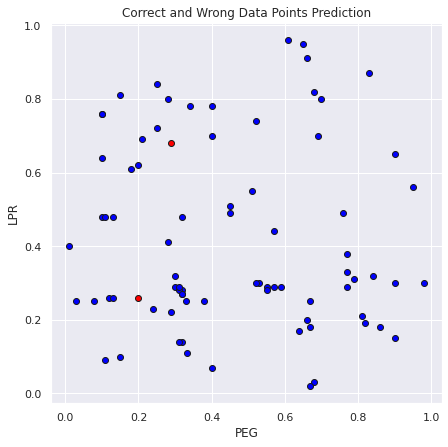

In [ ]:
PlotCorrectWrong_Preditions(y_test_,Max_probability_Class_ovA,X_test_)

### Plot Confusion Matrix of One Vs All Model Probability of final results Predictions.


Text(0.5, 1.0, 'One Vs All Model Probability of final results Predictions.')

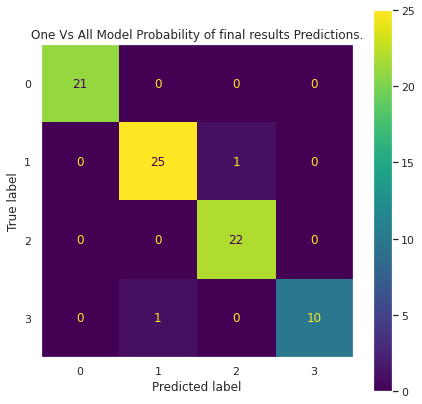

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_.to_numpy().squeeze().astype(int),Max_probability_Class_ovA.squeeze().astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title("One Vs All Model Probability of final results Predictions.")

#OVO

For each pair of classes, we labeled one class with 0, and the other with 1.
The formula for calculating the number of binary classes, and in turn, models, is as follows:
* (NumClasses * (NumClasses – 1)) / 2 <br>

For four classes, this gives us six binary classification problems:


*   (NumClasses * (NumClasses – 1)) / 2
*   (4 * (4 – 1)) / 2
*   (4 * 3) / 2
*   12 / 2
*   6


In [ ]:
df_train_ovo = df_train[['PEG', 'LPR','UNS']]
df_train_ovo

,PEG,LPR,UNS
0,0.00,0.00,3
1,0.90,0.24,0
2,0.30,0.65,2
3,0.24,0.98,1
4,0.66,0.10,2
...,...,...,...
318,0.89,0.32,0
319,0.83,0.83,0
320,0.32,0.13,1
321,0.57,0.57,2


In [ ]:
df_test_ovo = df_test[['PEG', 'LPR','UNS']]
df_test_ovo

,PEG,LPR,UNS
0,0.68,0.03,2
1,0.34,0.78,2
2,0.64,0.17,2
3,0.08,0.25,3
4,0.77,0.33,0
...,...,...,...
75,0.52,0.30,2
76,0.24,0.23,1
77,0.13,0.26,3
78,0.69,0.70,0


In [ ]:
df_test_ovo_features=df_test_ovo[['PEG', 'LPR']]
df_test_ovo_features


,PEG,LPR
0,0.68,0.03
1,0.34,0.78
2,0.64,0.17
3,0.08,0.25
4,0.77,0.33
...,...,...
75,0.52,0.30
76,0.24,0.23
77,0.13,0.26
78,0.69,0.70


In [ ]:
df_test_ovo_Labels =df_test_ovo[['UNS']]
df_test_ovo_Labels

,UNS
0,2
1,2
2,2
3,3
4,0
...,...
75,2
76,1
77,3
78,0


### **0 vs 1**

In [ ]:
df_train_01 = df_train_ovo[(df_train_ovo['UNS']== 0) | (df_train_ovo['UNS']== 1)]
df_train_01

,PEG,LPR,UNS
1,0.90,0.24,0
3,0.24,0.98,1
6,0.25,0.72,1
7,0.85,0.20,0
8,0.81,0.30,0
...,...,...,...
316,0.24,0.58,1
317,0.23,0.31,1
318,0.89,0.32,0
319,0.83,0.83,0


In [ ]:
df_test_01 = df_test_ovo[(df_test_ovo['UNS']== 0) | (df_test_ovo['UNS']== 1)]
df_test_01

,PEG,LPR,UNS
4,0.770,0.33,0
5,0.650,0.95,0
7,0.840,0.32,0
8,0.280,0.41,1
11,0.290,0.68,1
12,0.820,0.19,0
14,0.770,0.29,0
15,0.320,0.48,1
17,0.700,0.80,0
18,0.200,0.62,1


In [ ]:
X_train_01, y_train_01  = df_train_01[["PEG", "LPR"]], df_train_01["UNS"]
X_train_01, y_train_01

(      PEG   LPR
 1    0.90  0.24
 3    0.24  0.98
 6    0.25  0.72
 7    0.85  0.20
 8    0.81  0.30
 ..    ...   ...
 316  0.24  0.58
 317  0.23  0.31
 318  0.89  0.32
 319  0.83  0.83
 320  0.32  0.13
 
 [184 rows x 2 columns], 1      0
 3      1
 6      1
 7      0
 8      0
       ..
 316    1
 317    1
 318    0
 319    0
 320    1
 Name: UNS, Length: 184, dtype: int64)

In [ ]:
X_test_01, y_test_01  = df_test_01[["PEG", "LPR"]], df_test_01["UNS"]
X_test_01, y_test_01

(      PEG   LPR
 4   0.770  0.33
 5   0.650  0.95
 7   0.840  0.32
 8   0.280  0.41
 11  0.290  0.68
 12  0.820  0.19
 14  0.770  0.29
 15  0.320  0.48
 17  0.700  0.80
 18  0.200  0.62
 20  0.290  0.22
 21  0.300  0.32
 25  0.150  0.81
 27  0.810  0.21
 29  0.900  0.65
 30  0.860  0.18
 31  0.660  0.91
 33  0.680  0.82
 34  0.333  0.11
 35  0.950  0.56
 36  0.320  0.28
 38  0.250  0.72
 39  0.320  0.27
 41  0.900  0.15
 42  0.400  0.07
 44  0.210  0.69
 45  0.830  0.87
 46  0.100  0.76
 47  0.980  0.30
 49  0.180  0.61
 51  0.900  0.30
 52  0.300  0.29
 53  0.770  0.38
 54  0.380  0.25
 56  0.310  0.28
 57  0.330  0.25
 59  0.760  0.49
 60  0.790  0.31
 61  0.320  0.14
 68  0.610  0.96
 69  0.320  0.27
 70  0.310  0.29
 71  0.310  0.14
 72  0.100  0.76
 76  0.240  0.23
 78  0.690  0.70
 79  0.100  0.64, 4     0
 5     0
 7     0
 8     1
 11    1
 12    0
 14    0
 15    1
 17    0
 18    1
 20    1
 21    1
 25    1
 27    0
 29    0
 30    0
 31    0
 33    0
 34    1
 35    0
 36 

In [ ]:
clf_01 = SVC(kernel='linear', probability=True)
clf_01.fit(X_train_01, y_train_01)
print('Accuracy of clf_01_Train: {:.2f}%'.format(getAccuracy(clf_01, X_train_01, y_train_01)))
print('Accuracy of clf_01_Test: {:.2f}%'.format(getAccuracy(clf_01, X_test_01, y_test_01)))


Accuracy of clf_01_Train: 100.00%
Accuracy of clf_01_Test: 100.00%


The accuracy of class 0 vs 1-SVM  Linear Kernel for training and testing in order  is: 100%, 100%.

In [ ]:
df_test_ovo_Labels

,UNS
0,2
1,2
2,2
3,3
4,0
...,...
75,2
76,1
77,3
78,0


In [ ]:
yb_pred_01 = clf_01.predict_proba(df_test_ovo_features)
pr_01 = clf_01.predict(X_test_01)

CLasses :

1.   Class 0 is High
2.   Class 1 is Low 



In [ ]:
DataFrame_class_0_1=pd.DataFrame(clf_01.predict_proba(df_test_ovo_features), columns=clf_01.classes_)
DataFrame_class_0_1

,0,1
0,7.742428e-01,0.225757
1,1.395383e-01,0.860462
2,7.464222e-01,0.253578
3,1.138071e-07,1.000000
4,9.821551e-01,0.017845
...,...,...
75,3.671958e-01,0.632804
76,3.070393e-03,0.996930
77,7.276025e-07,0.999999
78,9.830682e-01,0.016932


In [ ]:
High_class_prop1=DataFrame_class_0_1[0]
High_class_prop1

0     7.742428e-01
1     1.395383e-01
2     7.464222e-01
3     1.138071e-07
4     9.821551e-01
          ...     
75    3.671958e-01
76    3.070393e-03
77    7.276025e-07
78    9.830682e-01
79    5.171211e-06
Name: 0, Length: 80, dtype: float64

In [ ]:
Low_class_prop1=DataFrame_class_0_1[1]
Low_class_prop1

0     0.225757
1     0.860462
2     0.253578
3     1.000000
4     0.017845
        ...   
75    0.632804
76    0.996930
77    0.999999
78    0.016932
79    0.999995
Name: 1, Length: 80, dtype: float64

### Decision boundary for Training

No handles with labels found to put in legend.


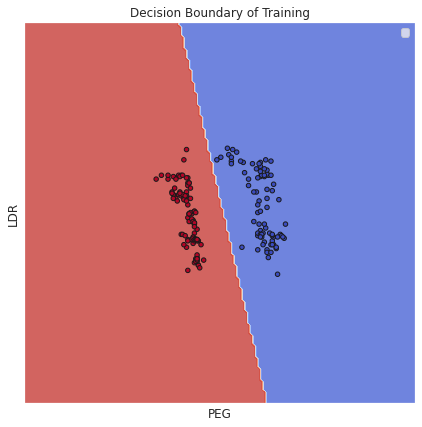

In [ ]:
MakeDecision_Boundary(X_train_01.values,y_train_01,clf_01, "Decision Boundary of Training")

### Decision boundary for Testing

No handles with labels found to put in legend.


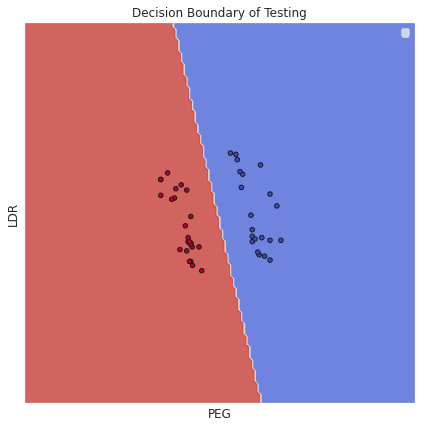

In [ ]:
MakeDecision_Boundary(X_test_01.values,y_test_01,clf_01, "Decision Boundary of Testing")

###Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix: 0 vs 1')

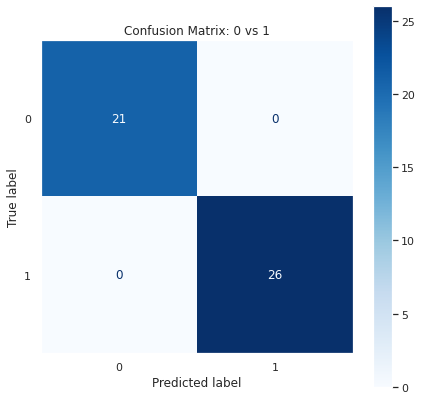

In [ ]:
asd_plot_01=plot_confusion_matrix(clf_01, X_test_01, y_test_01, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("Confusion Matrix: 0 vs 1")

In [ ]:
asd_values_01=confusion_matrix(y_test_01, pr_01)
asd_values_01

array([[21,  0],
       [ 0, 26]])

###Calculate Percenatage of Correct and False Prediction and Plot Piechart of results

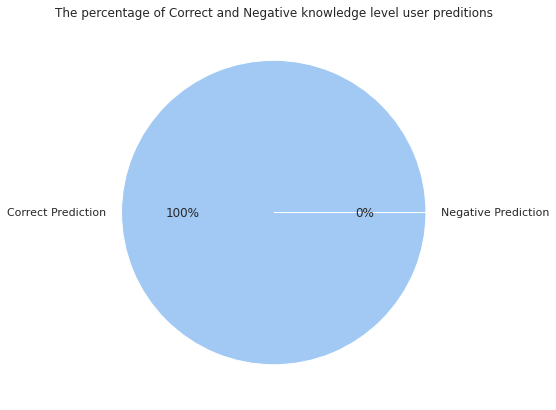

In [ ]:
a_01= asd_values_01[0][0]+asd_values_01[1][1], asd_values_01[0][1]+asd_values_01[1][0]
DrawPieChart(a_01)

### **0 vs 2**

In [ ]:
df_train_02 = df_train_ovo[(df_train_ovo['UNS']== 0) | (df_train_ovo['UNS']== 2)]
df_train_02

,PEG,LPR,UNS
1,0.90,0.24,0
2,0.30,0.65,2
4,0.66,0.10,2
5,0.56,0.29,2
7,0.85,0.20,0
...,...,...,...
313,0.55,0.47,2
318,0.89,0.32,0
319,0.83,0.83,0
321,0.57,0.57,2


In [ ]:
df_test_02 = df_test_ovo[(df_test_ovo['UNS']== 0) | (df_test_ovo['UNS']== 2)]
df_test_02

,PEG,LPR,UNS
0,0.68,0.03,2
1,0.34,0.78,2
2,0.64,0.17,2
4,0.77,0.33,0
5,0.65,0.95,0
6,0.45,0.49,2
7,0.84,0.32,0
9,0.57,0.44,2
10,0.45,0.51,2
12,0.82,0.19,0


## **Make birnarizer and make class 2 which is Medium equal to 1**


In [ ]:
df_train_02.loc[df_train_02.UNS == 2, "UNS"] = 1
df_test_02.loc[df_test_02.UNS == 2, "UNS"] = 1

In [ ]:
X_train_02, y_train_02  = df_train_02[["PEG", "LPR"]], df_train_02["UNS"]
X_train_02, y_train_02

(      PEG   LPR
 1    0.90  0.24
 2    0.30  0.65
 4    0.66  0.10
 5    0.56  0.29
 7    0.85  0.20
 ..    ...   ...
 313  0.55  0.47
 318  0.89  0.32
 319  0.83  0.83
 321  0.57  0.57
 322  0.24  0.97
 
 [181 rows x 2 columns], 1      0
 2      1
 4      1
 5      1
 7      0
       ..
 313    1
 318    0
 319    0
 321    1
 322    1
 Name: UNS, Length: 181, dtype: int64)

In [ ]:
X_test_02, y_test_02  = df_test_02[["PEG", "LPR"]], df_test_02["UNS"]
X_test_02, y_test_02

(     PEG   LPR
 0   0.68  0.03
 1   0.34  0.78
 2   0.64  0.17
 4   0.77  0.33
 5   0.65  0.95
 6   0.45  0.49
 7   0.84  0.32
 9   0.57  0.44
 10  0.45  0.51
 12  0.82  0.19
 14  0.77  0.29
 16  0.40  0.70
 17  0.70  0.80
 19  0.51  0.55
 22  0.66  0.20
 23  0.57  0.29
 24  0.59  0.29
 26  0.55  0.29
 27  0.81  0.21
 28  0.28  0.80
 29  0.90  0.65
 30  0.86  0.18
 31  0.66  0.91
 32  0.52  0.74
 33  0.68  0.82
 35  0.95  0.56
 40  0.25  0.84
 41  0.90  0.15
 43  0.53  0.30
 45  0.83  0.87
 47  0.98  0.30
 50  0.67  0.18
 51  0.90  0.30
 53  0.77  0.38
 58  0.40  0.78
 59  0.76  0.49
 60  0.79  0.31
 63  0.55  0.28
 68  0.61  0.96
 73  0.67  0.25
 74  0.67  0.02
 75  0.52  0.30
 78  0.69  0.70, 0     1
 1     1
 2     1
 4     0
 5     0
 6     1
 7     0
 9     1
 10    1
 12    0
 14    0
 16    1
 17    0
 19    1
 22    1
 23    1
 24    1
 26    1
 27    0
 28    1
 29    0
 30    0
 31    0
 32    1
 33    0
 35    0
 40    1
 41    0
 43    1
 45    0
 47    0
 50    1
 51    0

### Calculate Accuracy of Training and Testing data

In [ ]:
clf_02 = SVC(kernel='linear', probability=True)
clf_02.fit(X_train_02, y_train_02)
print('Accuracy of clf_02_Train: {:.2f}%'.format(getAccuracy(clf_02, X_train_02, y_train_02)))
print('Accuracy of clf_02_Test: {:.2f}%'.format(getAccuracy(clf_02, X_test_02, y_test_02)))

Accuracy of clf_02_Train: 98.34%
Accuracy of clf_02_Test: 100.00%


The accuracy of class 0 vs 2-SVM  Linear Kernel for training and testing in order  is: 98.34%, 100%.

In [ ]:
yb_pred_02 = clf_02.predict_proba(df_test_ovo_features).reshape(-1,1)
pr_02 = clf_02.predict(X_test_02)

CLasses :

1.   Class 0 is High
2.   Class 1 is Medium 



In [ ]:
DataFrame_class_0_2=pd.DataFrame(clf_02.predict_proba(df_test_ovo_features), columns=clf_02.classes_)
DataFrame_class_0_2

,0,1
0,1.117332e-02,0.988827
1,6.674672e-03,0.993325
2,1.960132e-02,0.980399
3,3.000001e-14,1.000000
4,8.508188e-01,0.149181
...,...,...
75,3.204140e-03,0.996796
76,6.722868e-13,1.000000
77,3.000001e-14,1.000000
78,9.813725e-01,0.018628


In [ ]:
High_class_prop2=DataFrame_class_0_2[0]
High_class_prop2

0     1.117332e-02
1     6.674672e-03
2     1.960132e-02
3     3.000001e-14
4     8.508188e-01
          ...     
75    3.204140e-03
76    6.722868e-13
77    3.000001e-14
78    9.813725e-01
79    5.182481e-12
Name: 0, Length: 80, dtype: float64

In [ ]:
Medium_class_prop1=DataFrame_class_0_2[1]
Medium_class_prop1

0     0.988827
1     0.993325
2     0.980399
3     1.000000
4     0.149181
        ...   
75    0.996796
76    1.000000
77    1.000000
78    0.018628
79    1.000000
Name: 1, Length: 80, dtype: float64

###Decision boundary for Training

No handles with labels found to put in legend.


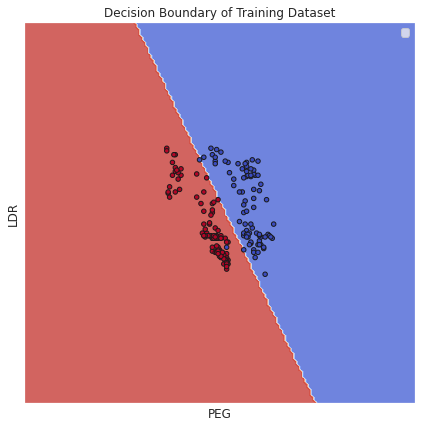

In [ ]:
MakeDecision_Boundary(X_train_02.values,y_train_02,clf_02, "Decision Boundary of Training Dataset")

### Decision boundary for Testing

No handles with labels found to put in legend.


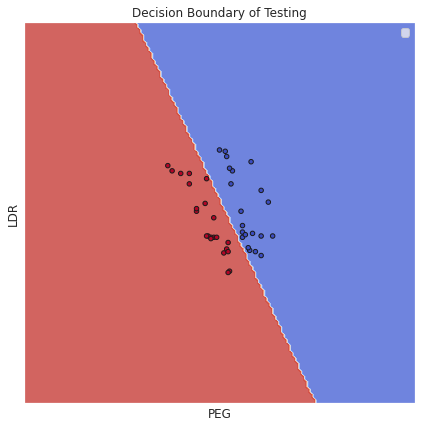

In [ ]:
MakeDecision_Boundary(X_test_02.values,y_test_02,clf_02, "Decision Boundary of Testing")

### Confusion Matrix of 0 vs 2

Text(0.5, 1.0, 'Confusion Matrix of 0 vs 2')

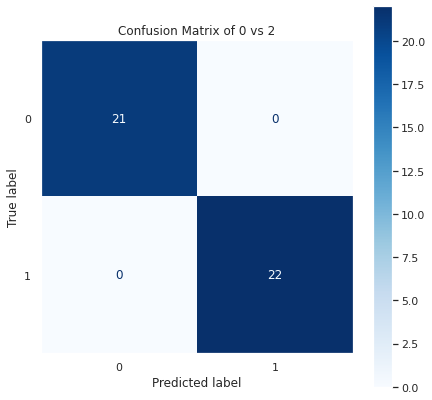

In [ ]:
asd_plot_02=plot_confusion_matrix(clf_02, X_test_02, y_test_02, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title('Confusion Matrix of 0 vs 2')

###Calculate Percentage  of Correct and False Prediction and Plot Piechart of results

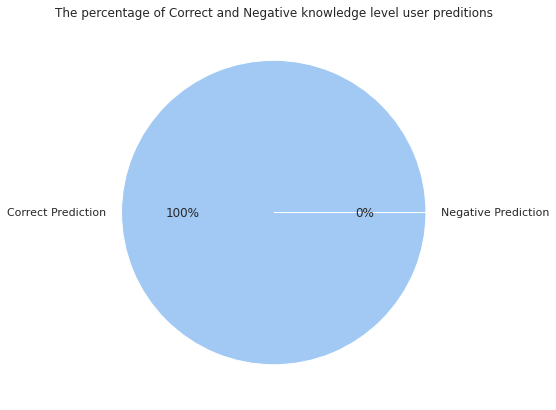

In [ ]:
asd_values_02=confusion_matrix(y_test_02, pr_02)
a_02= asd_values_02[0][0]+asd_values_02[1][1], asd_values_02[0][1]+asd_values_02[1][0]
DrawPieChart(a_02)

### 0 vs 3 

In [ ]:
df_train_03 = df_train_ovo[(df_train_ovo['UNS']== 0) | (df_train_ovo['UNS']== 3)]
df_train_03

,PEG,LPR,UNS
0,0.00,0.00,3
1,0.90,0.24,0
7,0.85,0.20,0
8,0.81,0.30,0
11,0.80,0.35,0
...,...,...,...
307,0.10,0.10,3
308,0.93,0.30,0
311,0.59,0.98,0
318,0.89,0.32,0


In [ ]:
df_test_03 = df_test_ovo[(df_test_ovo['UNS']== 0) | (df_test_ovo['UNS']== 3)]
df_test_03

,PEG,LPR,UNS
3,0.08,0.25,3
4,0.77,0.33,0
5,0.65,0.95,0
7,0.84,0.32,0
12,0.82,0.19,0
13,0.12,0.26,3
14,0.77,0.29,0
17,0.70,0.80,0
27,0.81,0.21,0
29,0.90,0.65,0


## **Make birnarizer and make class which is Very Low equal to 1**


In [ ]:
df_train_03.loc[df_train_03.UNS == 3, "UNS"] = 1
df_test_03.loc[df_test_03.UNS == 3, "UNS"] = 1

In [ ]:
X_train_03, y_train_03  = df_train_03[["PEG", "LPR"]], df_train_03["UNS"]
X_train_03, y_train_03

(      PEG   LPR
 0    0.00  0.00
 1    0.90  0.24
 7    0.85  0.20
 8    0.81  0.30
 11   0.80  0.35
 ..    ...   ...
 307  0.10  0.10
 308  0.93  0.30
 311  0.59  0.98
 318  0.89  0.32
 319  0.83  0.83
 
 [120 rows x 2 columns], 0      1
 1      0
 7      0
 8      0
 11     0
       ..
 307    1
 308    0
 311    0
 318    0
 319    0
 Name: UNS, Length: 120, dtype: int64)

In [ ]:
X_test_03, y_test_03  = df_test_03[["PEG", "LPR"]], df_test_03["UNS"]
X_test_03, y_test_03

(     PEG   LPR
 3   0.08  0.25
 4   0.77  0.33
 5   0.65  0.95
 7   0.84  0.32
 12  0.82  0.19
 13  0.12  0.26
 14  0.77  0.29
 17  0.70  0.80
 27  0.81  0.21
 29  0.90  0.65
 30  0.86  0.18
 31  0.66  0.91
 33  0.68  0.82
 35  0.95  0.56
 37  0.10  0.48
 41  0.90  0.15
 45  0.83  0.87
 47  0.98  0.30
 48  0.03  0.25
 51  0.90  0.30
 53  0.77  0.38
 55  0.11  0.48
 59  0.76  0.49
 60  0.79  0.31
 62  0.01  0.40
 64  0.20  0.26
 65  0.13  0.48
 66  0.11  0.09
 67  0.15  0.10
 68  0.61  0.96
 77  0.13  0.26
 78  0.69  0.70, 3     1
 4     0
 5     0
 7     0
 12    0
 13    1
 14    0
 17    0
 27    0
 29    0
 30    0
 31    0
 33    0
 35    0
 37    1
 41    0
 45    0
 47    0
 48    1
 51    0
 53    0
 55    1
 59    0
 60    0
 62    1
 64    1
 65    1
 66    1
 67    1
 68    0
 77    1
 78    0
 Name: UNS, dtype: int64)

In [ ]:
clf_03 = SVC(kernel='linear', probability=True)
clf_03.fit(X_train_03, y_train_03)
print('Accuracy of clf_03_Train: {:.2f}%'.format(getAccuracy(clf_03, X_train_03, y_train_03)))
print('Accuracy of clf_03_Test: {:.2f}%'.format(getAccuracy(clf_03, X_test_03, y_test_03)))

Accuracy of clf_03_Train: 100.00%
Accuracy of clf_03_Test: 100.00%


The accuracy of class 0 vs 3-SVM  Linear Kernel for training and testing in order  is: 100%, 100%.

In [ ]:
yb_pred_03 = clf_03.predict_proba(df_test_ovo_features).reshape(-1,1)
pr_03 = clf_03.predict(X_test_03)

CLasses :

1.   Class 0 is High
2.   Class 1 is Very Low 



In [ ]:
DataFrame_class_0_3=pd.DataFrame(clf_03.predict_proba(df_test_ovo_features), columns=clf_03.classes_)
DataFrame_class_0_3

,0,1
0,0.818951,0.181049
1,0.647301,0.352699
2,0.831916,0.168084
3,0.014467,0.985533
4,0.973387,0.026613
...,...,...
75,0.685051,0.314949
76,0.072488,0.927512
77,0.025646,0.974354
78,0.984128,0.015872


In [ ]:
High_class_prop3=DataFrame_class_0_3[0]
High_class_prop3

0     0.818951
1     0.647301
2     0.831916
3     0.014467
4     0.973387
        ...   
75    0.685051
76    0.072488
77    0.025646
78    0.984128
79    0.073415
Name: 0, Length: 80, dtype: float64

In [ ]:
Very_Low_class_prop1=DataFrame_class_0_3[1]
Very_Low_class_prop1

0     0.181049
1     0.352699
2     0.168084
3     0.985533
4     0.026613
        ...   
75    0.314949
76    0.927512
77    0.974354
78    0.015872
79    0.926585
Name: 1, Length: 80, dtype: float64

### Decision Boundary for Training

No handles with labels found to put in legend.


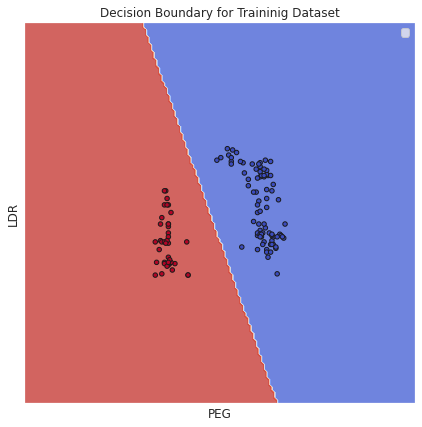

In [ ]:
MakeDecision_Boundary(X_train_03.values,y_train_03,clf_03, "Decision Boundary for Traininig Dataset")

### Decision Boundary for Testing

No handles with labels found to put in legend.


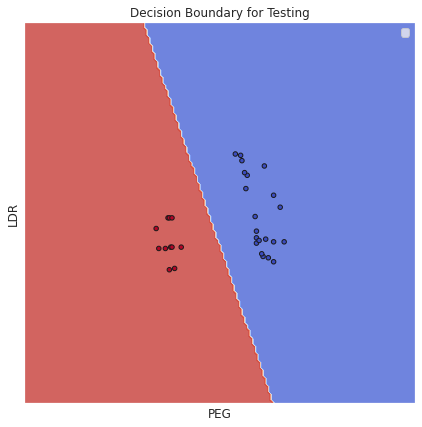

In [ ]:
MakeDecision_Boundary(X_test_03.values,y_test_03,clf_03, "Decision Boundary for Testing")

### Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of 0 vs 2')

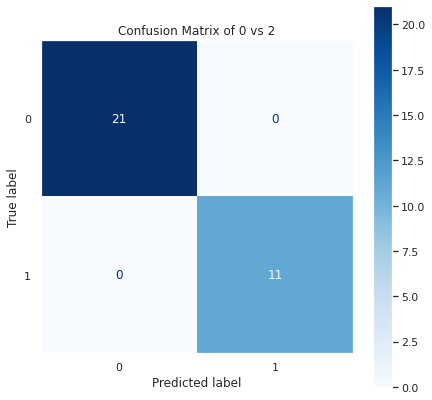

In [ ]:
asd_plot_03=plot_confusion_matrix(clf_03, X_test_03, y_test_03, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title('Confusion Matrix of 0 vs 2')

###Calculate Precenatage of Correct and False Prediction

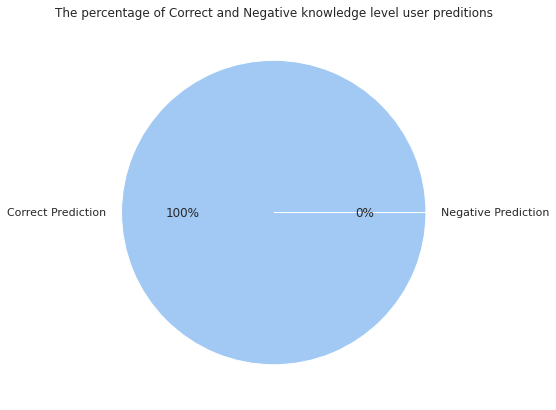

In [ ]:
asd_values_03=confusion_matrix(y_test_03, pr_03)
a_03= asd_values_03[0][0]+asd_values_03[1][1], asd_values_03[0][1]+asd_values_03[1][0]
DrawPieChart(a_03)

### 1 vs 2

In [ ]:
df_train_12 = df_train_ovo[(df_train_ovo['UNS']== 1) | (df_train_ovo['UNS']== 2)]
df_train_12

,PEG,LPR,UNS
2,0.30,0.65,2
3,0.24,0.98,1
4,0.66,0.10,2
5,0.56,0.29,2
6,0.25,0.72,1
...,...,...,...
316,0.24,0.58,1
317,0.23,0.31,1
320,0.32,0.13,1
321,0.57,0.57,2


In [ ]:
df_test_12 = df_test_ovo[(df_test_ovo['UNS']== 1) | (df_test_ovo['UNS']== 2)]
df_test_12

,PEG,LPR,UNS
0,0.680,0.03,2
1,0.340,0.78,2
2,0.640,0.17,2
6,0.450,0.49,2
8,0.280,0.41,1
9,0.570,0.44,2
10,0.450,0.51,2
11,0.290,0.68,1
15,0.320,0.48,1
16,0.400,0.70,2


## **Make birnarizer and make class 2 which is Medium equal to 0**



In [ ]:
df_train_12.loc[df_train_12.UNS == 2, "UNS"] = 0
df_test_12.loc[df_test_12.UNS == 2, "UNS"] = 0

In [ ]:
X_train_12, y_train_12  = df_train_12[["PEG", "LPR"]], df_train_12["UNS"]
X_train_12, y_train_12

(      PEG   LPR
 2    0.30  0.65
 3    0.24  0.98
 4    0.66  0.10
 5    0.56  0.29
 6    0.25  0.72
 ..    ...   ...
 316  0.24  0.58
 317  0.23  0.31
 320  0.32  0.13
 321  0.57  0.57
 322  0.24  0.97
 
 [203 rows x 2 columns], 2      0
 3      1
 4      0
 5      0
 6      1
       ..
 316    1
 317    1
 320    1
 321    0
 322    0
 Name: UNS, Length: 203, dtype: int64)

In [ ]:
X_test_12, y_test_12  = df_test_12[["PEG", "LPR"]], df_test_12["UNS"]
X_test_12, y_test_12

(      PEG   LPR
 0   0.680  0.03
 1   0.340  0.78
 2   0.640  0.17
 6   0.450  0.49
 8   0.280  0.41
 9   0.570  0.44
 10  0.450  0.51
 11  0.290  0.68
 15  0.320  0.48
 16  0.400  0.70
 18  0.200  0.62
 19  0.510  0.55
 20  0.290  0.22
 21  0.300  0.32
 22  0.660  0.20
 23  0.570  0.29
 24  0.590  0.29
 25  0.150  0.81
 26  0.550  0.29
 28  0.280  0.80
 32  0.520  0.74
 34  0.333  0.11
 36  0.320  0.28
 38  0.250  0.72
 39  0.320  0.27
 40  0.250  0.84
 42  0.400  0.07
 43  0.530  0.30
 44  0.210  0.69
 46  0.100  0.76
 49  0.180  0.61
 50  0.670  0.18
 52  0.300  0.29
 54  0.380  0.25
 56  0.310  0.28
 57  0.330  0.25
 58  0.400  0.78
 61  0.320  0.14
 63  0.550  0.28
 69  0.320  0.27
 70  0.310  0.29
 71  0.310  0.14
 72  0.100  0.76
 73  0.670  0.25
 74  0.670  0.02
 75  0.520  0.30
 76  0.240  0.23
 79  0.100  0.64, 0     0
 1     0
 2     0
 6     0
 8     1
 9     0
 10    0
 11    1
 15    1
 16    0
 18    1
 19    0
 20    1
 21    1
 22    0
 23    0
 24    0
 25    1
 26  

###**Using Linear Classifier**

In [ ]:
clf_12_linear = SVC(kernel='linear', probability=True)
clf_12_linear.fit(X_train_12, y_train_12)
print('Accuracy of clf_12_Train: {:.2f}%'.format(getAccuracy(clf_12_linear, X_train_12, y_train_12)))
print('Accuracy of clf_12_Test: {:.2f}%'.format(getAccuracy(clf_12_linear, X_test_12, y_test_12)))

Accuracy of clf_12_Train: 91.63%
Accuracy of clf_12_Test: 95.83%


The accuracy of class 1 vs 2-SVM Linear Kernel for training and testing in order  is: 91.63%, 95.83%.

###**Using Also 'RBF' Kernel and take classifier with high Accuracy:**


In [ ]:
clf_12 = SVC(kernel='rbf', probability=True)
clf_12.fit(X_train_12, y_train_12)
print('Accuracy of clf_12_Train: {:.2f}%'.format(getAccuracy(clf_12, X_train_12, y_train_12)))
print('Accuracy of clf_12_Test: {:.2f}%'.format(getAccuracy(clf_12, X_test_12, y_test_12)))

Accuracy of clf_12_Train: 96.55%
Accuracy of clf_12_Test: 100.00%


The accuracy of class 1 vs 2-SVM Non-Linear Kernel for training and testing in order  is: 96.55%, 100% shows better performance than linear kernel.

In [ ]:
yb_pred_12 = clf_12.predict_proba(df_test_ovo_features).reshape(-1,1)
pr_12 = clf_12.predict(X_test_12).reshape(-1,1)

CLasses :

1.   Class 0 is Medium
2.   Class 1 is Low 



In [ ]:
DataFrame_class_1_2=pd.DataFrame(clf_12.predict_proba(df_test_ovo_features), columns=clf_12.classes_)

CLasses :

1.   Class 0 is Medium
2.   Class 1 is Low 



In [ ]:
DataFrame_class_1_2

,0,1
0,0.950766,0.049234
1,0.957489,0.042511
2,0.985985,0.014015
3,0.046028,0.953972
4,0.982911,0.017089
...,...,...
75,0.968875,0.031125
76,0.016035,0.983965
77,0.022384,0.977616
78,0.963832,0.036168


In [ ]:
Medium_class_prop2=DataFrame_class_1_2[0]
Medium_class_prop2

0     0.950766
1     0.957489
2     0.985985
3     0.046028
4     0.982911
        ...   
75    0.968875
76    0.016035
77    0.022384
78    0.963832
79    0.004346
Name: 0, Length: 80, dtype: float64

In [ ]:
Low_class_prop2=DataFrame_class_1_2[1]
Low_class_prop1

0     0.225757
1     0.860462
2     0.253578
3     1.000000
4     0.017845
        ...   
75    0.632804
76    0.996930
77    0.999999
78    0.016932
79    0.999995
Name: 1, Length: 80, dtype: float64

### Decision Boundary for Training

No handles with labels found to put in legend.


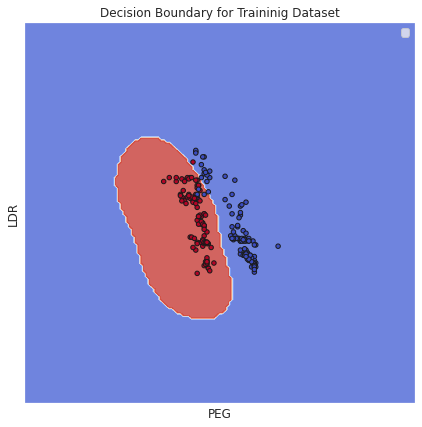

In [ ]:
MakeDecision_Boundary(X_train_12.values,y_train_12,clf_12, "Decision Boundary for Traininig Dataset")

### Decision Boundary for Testing

No handles with labels found to put in legend.


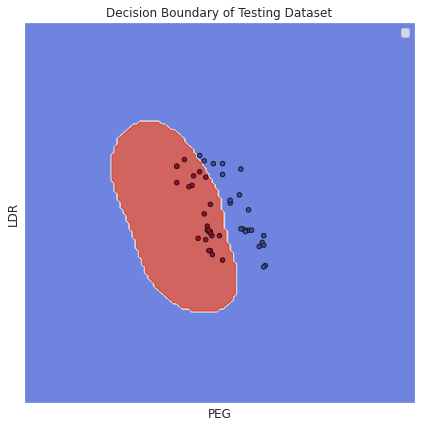

In [ ]:
MakeDecision_Boundary(X_test_12.values,y_test_12,clf_12, "Decision Boundary of Testing Dataset")

### Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of 1 vs 2_ non Linear Kernel')

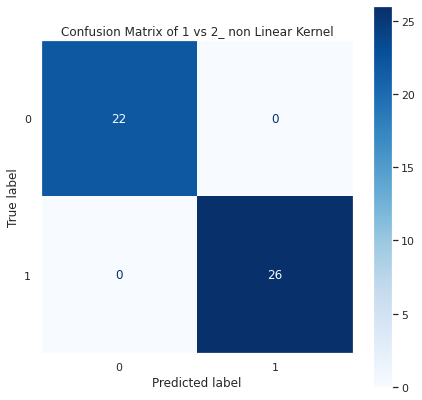

In [ ]:
asd_plot_12=plot_confusion_matrix(clf_12, X_test_12, y_test_12, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("Confusion Matrix of 1 vs 2_ non Linear Kernel")

###Calculate Percentage  of Correct and False Prediction

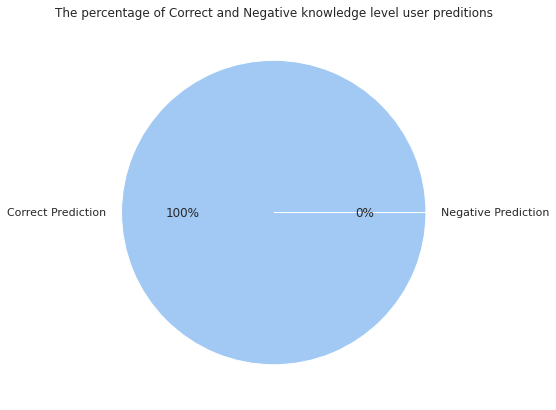

In [ ]:
asd_values_12=confusion_matrix(y_test_12, pr_12)
a_12= asd_values_12[0][0]+asd_values_12[1][1], asd_values_12[0][1]+asd_values_12[1][0]
DrawPieChart(a_12)

### 1 vs 3

In [ ]:
df_train_13 = df_train_ovo[(df_train_ovo['UNS']== 1) | (df_train_ovo['UNS']== 3)]
df_train_13

,PEG,LPR,UNS
0,0.00,0.00,3
3,0.24,0.98,1
6,0.25,0.72,1
9,0.30,0.41,1
12,0.05,0.01,3
...,...,...,...
314,0.22,0.24,1
315,0.21,0.32,1
316,0.24,0.58,1
317,0.23,0.31,1


In [ ]:
df_test_13 = df_test_ovo[(df_test_ovo['UNS']== 1) | (df_test_ovo['UNS']== 3)]
df_test_13

,PEG,LPR,UNS
3,0.080,0.25,3
8,0.280,0.41,1
11,0.290,0.68,1
13,0.120,0.26,3
15,0.320,0.48,1
18,0.200,0.62,1
20,0.290,0.22,1
21,0.300,0.32,1
25,0.150,0.81,1
34,0.333,0.11,1


## **Make birnarizer and make class 3 which is Very Low equal to 0**

In [ ]:
df_train_13.loc[df_train_13.UNS == 3, "UNS"] = 0
df_test_13.loc[df_test_13.UNS == 3, "UNS"] = 0

In [ ]:
X_train_13, y_train_13  = df_train_13[["PEG", "LPR"]], df_train_13["UNS"]
X_train_13, y_train_13

(      PEG   LPR
 0    0.00  0.00
 3    0.24  0.98
 6    0.25  0.72
 9    0.30  0.41
 12   0.05  0.01
 ..    ...   ...
 314  0.22  0.24
 315  0.21  0.32
 316  0.24  0.58
 317  0.23  0.31
 320  0.32  0.13
 
 [142 rows x 2 columns], 0      0
 3      1
 6      1
 9      1
 12     0
       ..
 314    1
 315    1
 316    1
 317    1
 320    1
 Name: UNS, Length: 142, dtype: int64)

In [ ]:
X_test_13, y_test_13  = df_test_13[["PEG", "LPR"]], df_test_13["UNS"]
X_test_13, y_test_13

(      PEG   LPR
 3   0.080  0.25
 8   0.280  0.41
 11  0.290  0.68
 13  0.120  0.26
 15  0.320  0.48
 18  0.200  0.62
 20  0.290  0.22
 21  0.300  0.32
 25  0.150  0.81
 34  0.333  0.11
 36  0.320  0.28
 37  0.100  0.48
 38  0.250  0.72
 39  0.320  0.27
 42  0.400  0.07
 44  0.210  0.69
 46  0.100  0.76
 48  0.030  0.25
 49  0.180  0.61
 52  0.300  0.29
 54  0.380  0.25
 55  0.110  0.48
 56  0.310  0.28
 57  0.330  0.25
 61  0.320  0.14
 62  0.010  0.40
 64  0.200  0.26
 65  0.130  0.48
 66  0.110  0.09
 67  0.150  0.10
 69  0.320  0.27
 70  0.310  0.29
 71  0.310  0.14
 72  0.100  0.76
 76  0.240  0.23
 77  0.130  0.26
 79  0.100  0.64, 3     0
 8     1
 11    1
 13    0
 15    1
 18    1
 20    1
 21    1
 25    1
 34    1
 36    1
 37    0
 38    1
 39    1
 42    1
 44    1
 46    1
 48    0
 49    1
 52    1
 54    1
 55    0
 56    1
 57    1
 61    1
 62    0
 64    0
 65    0
 66    0
 67    0
 69    1
 70    1
 71    1
 72    1
 76    1
 77    0
 79    1
 Name: UNS, dtype: in

###**Using Linear Classifier**

In [ ]:
clf_13_lin = SVC(kernel='linear', probability=True)
clf_13_lin.fit(X_train_13, y_train_13)
print('Accuracy of clf_13_Train: {:.2f}%'.format(getAccuracy(clf_13_lin, X_train_13, y_train_13)))
print('Accuracy of clf_13_Test: {:.2f}%'.format(getAccuracy(clf_13_lin, X_test_13, y_test_13)))

Accuracy of clf_13_Train: 89.44%
Accuracy of clf_13_Test: 86.49%


The accuracy of class 1 vs 3-SVM Linear Kernel for training and testing in order  is: 89.44%, 86.49%.

In [ ]:
yb_pred_13_linear = clf_13_lin.predict_proba(df_test_ovo_features)
pr_13_linear = clf_13_lin.predict(X_test_13)

###**Using Also 'RBF' Kernel and take classifier with high Accuracy:**

In [ ]:
clf_13 = SVC(kernel='rbf', probability=True)
clf_13.fit(X_train_13, y_train_13)
print('Accuracy of clf_13_Train: {:.2f}%'.format(getAccuracy(clf_13, X_train_13, y_train_13)))
print('Accuracy of clf_13_Test: {:.2f}%'.format(getAccuracy(clf_13, X_test_13, y_test_13)))

Accuracy of clf_13_Train: 97.18%
Accuracy of clf_13_Test: 97.30%


The accuracy of class 1 vs 3-SVM Non-Linear Kernel for training and testing in order  is: 97.18%, 97.30% shows better performance than linear kernel.

In [ ]:
yb_pred_13 = clf_13.predict_proba(df_test_ovo_features)
pr_13 = clf_13.predict(X_test_13)

CLasses :

1.   Class 0 is Very Low
2.   Class 1 is Low 



In [ ]:
DataFrame_class_1_3=pd.DataFrame(clf_13.predict_proba(df_test_ovo_features), columns=clf_13.classes_)
DataFrame_class_1_3

,0,1
0,0.207275,0.792725
1,0.008176,0.991824
2,0.091620,0.908380
3,0.992108,0.007892
4,0.314693,0.685307
...,...,...
75,0.010186,0.989814
76,0.079118,0.920882
77,0.940167,0.059833
78,0.325621,0.674379


In [ ]:
Very_Low_class_prop2=DataFrame_class_1_3[0]
Very_Low_class_prop2

0     0.207275
1     0.008176
2     0.091620
3     0.992108
4     0.314693
        ...   
75    0.010186
76    0.079118
77    0.940167
78    0.325621
79    0.208423
Name: 0, Length: 80, dtype: float64

In [ ]:
Low_class_prop3=DataFrame_class_1_3[1]
Low_class_prop3

0     0.792725
1     0.991824
2     0.908380
3     0.007892
4     0.685307
        ...   
75    0.989814
76    0.920882
77    0.059833
78    0.674379
79    0.791577
Name: 1, Length: 80, dtype: float64

### Decision boundary for Training

No handles with labels found to put in legend.


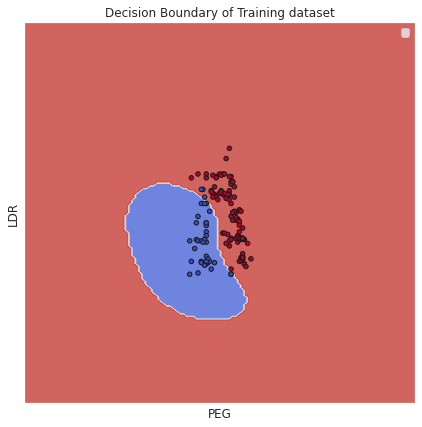

In [ ]:
MakeDecision_Boundary(X_train_13.values,y_train_13,clf_13, "Decision Boundary of Training dataset")

### Decision boundary for Testing

No handles with labels found to put in legend.


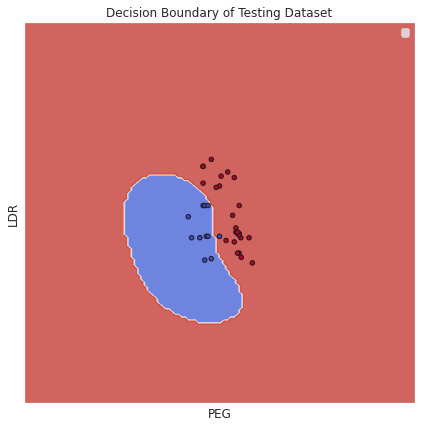

In [ ]:
MakeDecision_Boundary(X_test_13.values,y_test_13,clf_13, "Decision Boundary of Testing Dataset")

##Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of 1 vs 3_ non Linear Kernel')

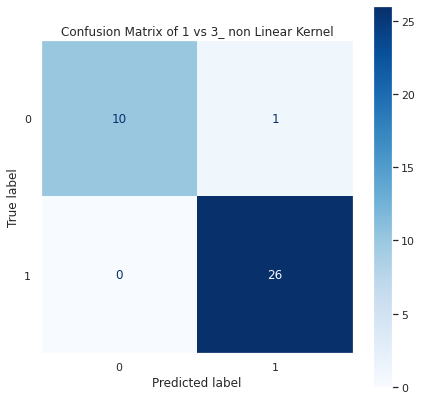

In [ ]:
asd_plot_13=plot_confusion_matrix(clf_13, X_test_13, y_test_13, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("Confusion Matrix of 1 vs 3_ non Linear Kernel")

###Calculate Percentage  of Correct and False Prediction

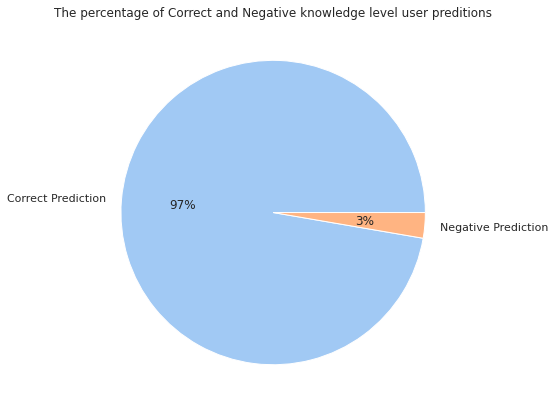

In [ ]:
asd_values_13=confusion_matrix(y_test_13, pr_13)
a_13= asd_values_13[0][0]+asd_values_13[1][1], asd_values_13[0][1]+asd_values_13[1][0]
DrawPieChart(a_13)

### 2 vs 3

In [ ]:
df_train_23 = df_train_ovo[(df_train_ovo['UNS']== 2) | (df_train_ovo['UNS']== 3)]
df_train_23

,PEG,LPR,UNS
0,0.00,0.00,3
2,0.30,0.65,2
4,0.66,0.10,2
5,0.56,0.29,2
10,0.60,0.30,2
...,...,...,...
303,0.60,0.35,2
307,0.10,0.10,3
313,0.55,0.47,2
321,0.57,0.57,2


In [ ]:
df_test_23 = df_test_ovo[(df_test_ovo['UNS']== 2) | (df_test_ovo['UNS']== 3)]
df_test_23

,PEG,LPR,UNS
0,0.68,0.03,2
1,0.34,0.78,2
2,0.64,0.17,2
3,0.08,0.25,3
6,0.45,0.49,2
9,0.57,0.44,2
10,0.45,0.51,2
13,0.12,0.26,3
16,0.40,0.70,2
19,0.51,0.55,2


##**Make birnarize label that make class 3 which is Very Low equal to 0**

## **and class 2 which is medium to 1**


In [ ]:
df_train_23.loc[df_train_23.UNS == 3, "UNS"] = 0
df_train_23.loc[df_train_23.UNS == 2, "UNS"] = 1

In [ ]:
df_test_23.loc[df_test_23.UNS == 3, "UNS"] = 0
df_test_23.loc[df_test_23.UNS == 2, "UNS"] = 1

In [ ]:
X_train_23, y_train_23  = df_train_23[["PEG", "LPR"]], df_train_23["UNS"]
X_train_23, y_train_23

(      PEG   LPR
 0    0.00  0.00
 2    0.30  0.65
 4    0.66  0.10
 5    0.56  0.29
 10   0.60  0.30
 ..    ...   ...
 303  0.60  0.35
 307  0.10  0.10
 313  0.55  0.47
 321  0.57  0.57
 322  0.24  0.97
 
 [139 rows x 2 columns], 0      0
 2      1
 4      1
 5      1
 10     1
       ..
 303    1
 307    0
 313    1
 321    1
 322    1
 Name: UNS, Length: 139, dtype: int64)

In [ ]:
X_test_23, y_test_23  = df_test_23[["PEG", "LPR"]], df_test_23["UNS"]
X_test_23, y_test_23

(     PEG   LPR
 0   0.68  0.03
 1   0.34  0.78
 2   0.64  0.17
 3   0.08  0.25
 6   0.45  0.49
 9   0.57  0.44
 10  0.45  0.51
 13  0.12  0.26
 16  0.40  0.70
 19  0.51  0.55
 22  0.66  0.20
 23  0.57  0.29
 24  0.59  0.29
 26  0.55  0.29
 28  0.28  0.80
 32  0.52  0.74
 37  0.10  0.48
 40  0.25  0.84
 43  0.53  0.30
 48  0.03  0.25
 50  0.67  0.18
 55  0.11  0.48
 58  0.40  0.78
 62  0.01  0.40
 63  0.55  0.28
 64  0.20  0.26
 65  0.13  0.48
 66  0.11  0.09
 67  0.15  0.10
 73  0.67  0.25
 74  0.67  0.02
 75  0.52  0.30
 77  0.13  0.26, 0     1
 1     1
 2     1
 3     0
 6     1
 9     1
 10    1
 13    0
 16    1
 19    1
 22    1
 23    1
 24    1
 26    1
 28    1
 32    1
 37    0
 40    1
 43    1
 48    0
 50    1
 55    0
 58    1
 62    0
 63    1
 64    0
 65    0
 66    0
 67    0
 73    1
 74    1
 75    1
 77    0
 Name: UNS, dtype: int64)

### Accuracy of train and test data

In [ ]:
clf_23 = SVC(kernel='linear', probability=True)
clf_23.fit(X_train_23, y_train_23)
print('Accuracy of clf_23_Train: {:.2f}%'.format(getAccuracy(clf_23, X_train_23, y_train_23)))
print('Accuracy of clf_23_Test: {:.2f}%'.format(getAccuracy(clf_23, X_test_23, y_test_23)))

Accuracy of clf_23_Train: 100.00%
Accuracy of clf_23_Test: 100.00%


The accuracy of class 2 vs 3-SVM Linear Kernel for training and testing in order  is: 100%, 100%.

CLasses :

1.   Class 0 is Very Low
2.   Class 1 is Medium 



In [ ]:
yb_pred_23 = clf_23.predict_proba(df_test_ovo_features).reshape(-1,1)
pr_23 = clf_23.predict(X_test_23)

In [ ]:
DataFrame_class_2_3=pd.DataFrame(clf_23.predict_proba(df_test_ovo_features), columns=clf_23.classes_)
DataFrame_class_2_3

,0,1
0,7.858534e-03,0.992141
1,1.095324e-02,0.989047
2,5.311269e-03,0.994689
3,9.932713e-01,0.006729
4,3.706004e-08,1.000000
...,...,...
75,1.824120e-02,0.981759
76,8.862789e-01,0.113721
77,9.806596e-01,0.019340
78,1.693100e-09,1.000000


In [ ]:
Very_Low_class_prop3=DataFrame_class_2_3[0]
Very_Low_class_prop3

0     7.858534e-03
1     1.095324e-02
2     5.311269e-03
3     9.932713e-01
4     3.706004e-08
          ...     
75    1.824120e-02
76    8.862789e-01
77    9.806596e-01
78    1.693100e-09
79    7.930533e-01
Name: 0, Length: 80, dtype: float64

In [ ]:
Medium_class_prop3=DataFrame_class_2_3[1]
Medium_class_prop3

0     0.992141
1     0.989047
2     0.994689
3     0.006729
4     1.000000
        ...   
75    0.981759
76    0.113721
77    0.019340
78    1.000000
79    0.206947
Name: 1, Length: 80, dtype: float64

### Decision Boundary for Training

No handles with labels found to put in legend.


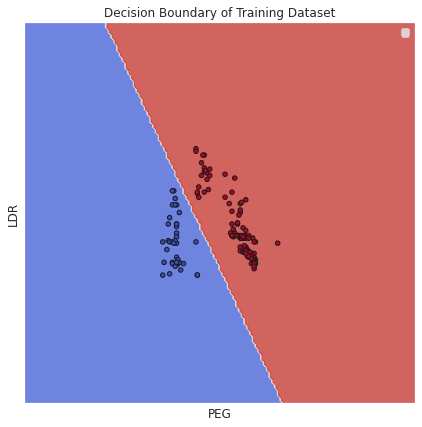

In [ ]:
MakeDecision_Boundary(X_train_23.values,y_train_23,clf_23, "Decision Boundary of Training Dataset")

### Decision Boundary for Testing

No handles with labels found to put in legend.


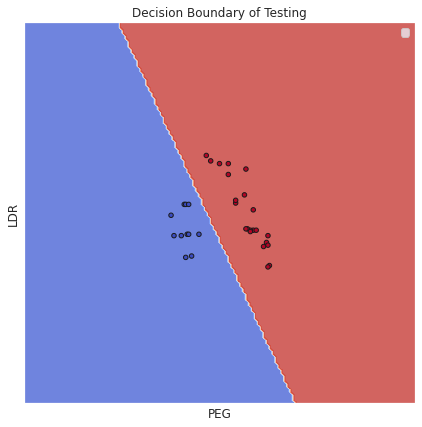

In [ ]:
MakeDecision_Boundary(X_test_23.values,y_test_23,clf_23,"Decision Boundary of Testing")

### Calculate and Plot Confusion Matrix

Text(0.5, 1.0, 'Confuison Matrix of 2 vs 3_ Non Linear Kernel')

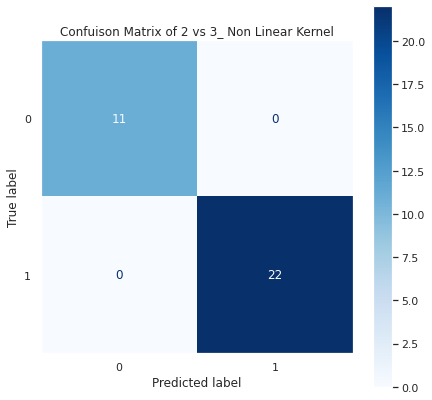

In [ ]:
asd_plot_01=plot_confusion_matrix(clf_23, X_test_23, y_test_23, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title('Confuison Matrix of 2 vs 3_ Non Linear Kernel') 

###Calculate Percentage  of Correct and False Prediction and Plot Piechart of results

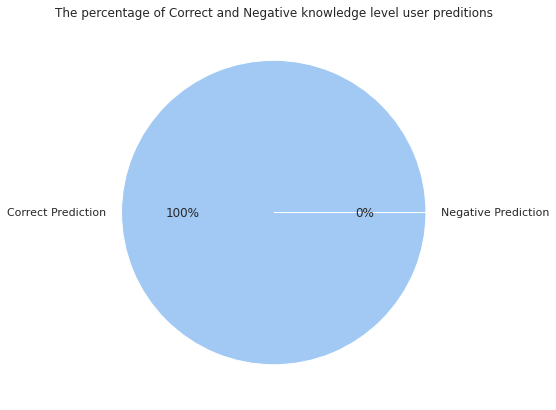

In [ ]:
asd_values_23=confusion_matrix(y_test_23, pr_23)
a_23= asd_values_23[0][0]+asd_values_23[1][1], asd_values_23[0][1]+asd_values_23[1][0]
DrawPieChart(a_23)

#ArgMax

###Calculate and Summation of predicted probability of each class:

In [ ]:
Sum_Medium_class2_prop=Medium_class_prop1 +Medium_class_prop2 +Medium_class_prop3
Sum_Medium_class2_prop

0     2.931734
1     2.939861
2     2.961073
3     1.052757
4     2.132092
        ...   
75    2.947430
76    1.129757
77    1.041724
78    1.982460
79    1.211293
Length: 80, dtype: float64

In [ ]:
Medium_class2_prop = Sum_Medium_class2_prop / 3
Medium_class2_prop = np.asarray(Medium_class2_prop).reshape(-1,1)

In [ ]:
Sum_Very_Low_class3_prop=Very_Low_class_prop1 + Very_Low_class_prop2 +Very_Low_class_prop3
Sum_Very_Low_class3_prop

0     0.396182
1     0.371829
2     0.265016
3     2.970912
4     0.341307
        ...   
75    0.343376
76    1.892909
77    2.895180
78    0.341493
79    1.928060
Length: 80, dtype: float64

In [ ]:
Very_Low_class3_prop = Sum_Very_Low_class3_prop / 3
Very_Low_class3_prop = np.asarray(Very_Low_class3_prop).reshape(-1,1)

In [ ]:
Sum_Low_class1_prop = Low_class_prop1 +Low_class_prop2 +Low_class_prop3
Sum_Low_class1_prop

0     1.067716
1     1.894797
2     1.175972
3     1.961864
4     0.720241
        ...   
75    1.653743
76    2.901777
77    2.037449
78    0.727479
79    2.787226
Name: 1, Length: 80, dtype: float64

In [ ]:
Low_class1_prop = Sum_Low_class1_prop / 3
Low_class1_prop = np.asarray(Low_class1_prop).reshape(-1,1)

In [ ]:
Sum_High_class0_prop =High_class_prop1 + High_class_prop2 + High_class_prop3
Sum_High_class0_prop

0     1.604368
1     0.793514
2     1.597939
3     0.014467
4     2.806360
        ...   
75    1.055451
76    0.075558
77    0.025647
78    2.948568
79    0.073421
Name: 0, Length: 80, dtype: float64

In [ ]:
High_class0_prop = Sum_High_class0_prop / 3
High_class0_prop = np.asarray(High_class0_prop).reshape(-1,1)

In [ ]:
allprobability_ovo = np.hstack((High_class0_prop, Low_class1_prop, Medium_class2_prop, Very_Low_class3_prop))
allprobability_ovo 

array([[0.535, 0.356, 0.977, 0.132],
       [0.265, 0.632, 0.98 , 0.124],
       [0.533, 0.392, 0.987, 0.088],
       [0.005, 0.654, 0.351, 0.99 ],
       [0.935, 0.24 , 0.711, 0.114],
       [0.992, 0.222, 0.657, 0.13 ],
       [0.313, 0.613, 0.956, 0.117],
       [0.985, 0.224, 0.661, 0.131],
       [0.068, 0.982, 0.529, 0.421],
       [0.549, 0.415, 0.973, 0.063],
       [0.326, 0.604, 0.96 , 0.11 ],
       [0.156, 0.877, 0.753, 0.214],
       [0.924, 0.231, 0.718, 0.126],
       [0.008, 0.672, 0.347, 0.974],
       [0.909, 0.244, 0.735, 0.112],
       [0.119, 0.954, 0.644, 0.283],
       [0.331, 0.59 , 0.982, 0.097],
       [0.992, 0.23 , 0.653, 0.125],
       [0.062, 0.987, 0.54 , 0.41 ],
       [0.484, 0.474, 0.974, 0.067],
       [0.041, 0.984, 0.422, 0.553],
       [0.062, 0.981, 0.501, 0.455],
       [0.582, 0.356, 0.98 , 0.082],
       [0.458, 0.469, 0.99 , 0.084],
       [0.499, 0.436, 0.989, 0.076],
       [0.071, 0.977, 0.599, 0.354],
       [0.414, 0.503, 0.989, 0.095],
 

In [ ]:
Max_probability_Class_ovo = np.argmax(allprobability_ovo, axis=1)
Max_probability_Class_ovo.reshape((-1,1))

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]])

In [ ]:
Max_probability_Class_ovo.shape

(80,)

In [ ]:
df_test_ovo_Labels

,UNS
0,2
1,2
2,2
3,3
4,0
...,...
75,2
76,1
77,3
78,0


In [ ]:
Max_probability_Class_ovo

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

### Accuracy of OVO

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Max_probability_Class_ovo,df_test_ovo_Labels)

0.9875

The accuracy  of One vs One obtained from predicted probability from each model of 6 models after binarized labels, then using argmax and aggregation is: 98.75%.

### Plot Correct and Wrong_Preditions of OVO Model final results of Probability predictioins

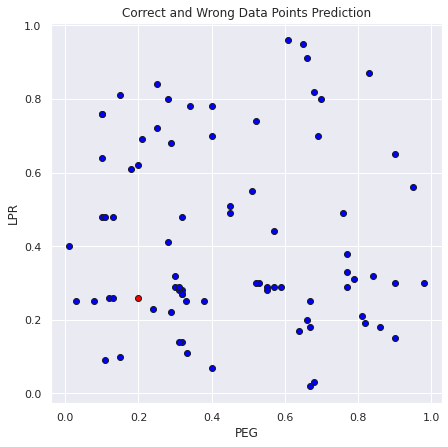

In [ ]:
PlotCorrectWrong_Preditions(df_test_ovo_Labels,Max_probability_Class_ovo,df_test_ovo_features)

### Plot Confusion Matrix of OVO Model Probability of final results Predictions.


Text(0.5, 1.0, 'Confusion Matrix of OVO Model Probability of final results Predictions')

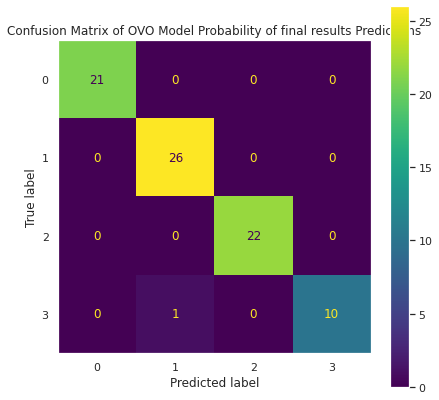

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_test_ovo_Labels, Max_probability_Class_ovo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title("Confusion Matrix of OVO Model Probability of final results Predictions")

Conclusion:
In this project, we implemented different algorithms and technique to solve the problem
of user knowledge, we learned:
- Feature selection using: - Correlation Matrix, - univariate Feature Selection, - .coef
parameter.
- Models
• SVM: with linear and nonlinear, and the nonlinear kernel shows better performance
than linear kernel, with an accuracy of 96%, 97% for training and testing, on order.
• Perceptron: This model shows result worse than the SVM mode, with an accuracy
of 72%, 66% for training and testing, on order.
- Approaches:
• OvR-SVM Approach: we made four models by label one class with 1 and the rest
with 0 for the four classes.
• OvO-SVM Approach: For each pair of classes, we labeled one class with 0, and the
other with 1, and came out with six classes, and in turn, models.
we calculated the num of classes = (NumClasses*(NumClasses–1)) / 2
- Aggregated results:
• OvR-SVM: After the binarization, we calculated the confidence score for these
classes and used the argmax to get the index of the maximum value of confidence
score.
• OvO-SVM: We have 6 classes and got 3 confidence score for each class, so we sum
each class confidence score, and take the mean, and used the argmax to get the index
of the maximum value of confidence score.
• We visualized each result of our approaches.